In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from matplotlib import gridspec
import scipy.stats as stats
from scipy.stats import shapiro
import feature_engine.transformation as vt
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')

In [2]:
#import dataset
df = pd.read_csv('data.csv')

#### Take a general look of the data

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Check for missing values

<AxesSubplot:>

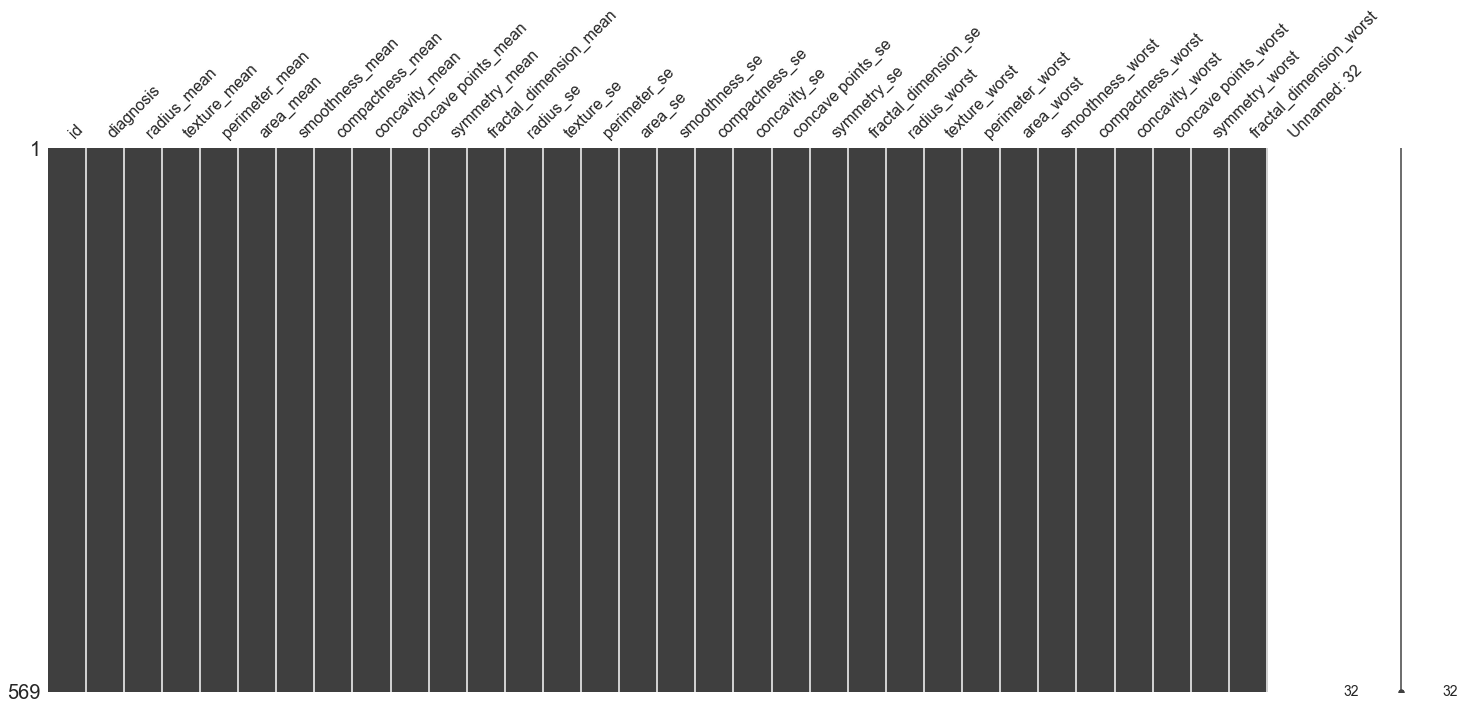

In [5]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

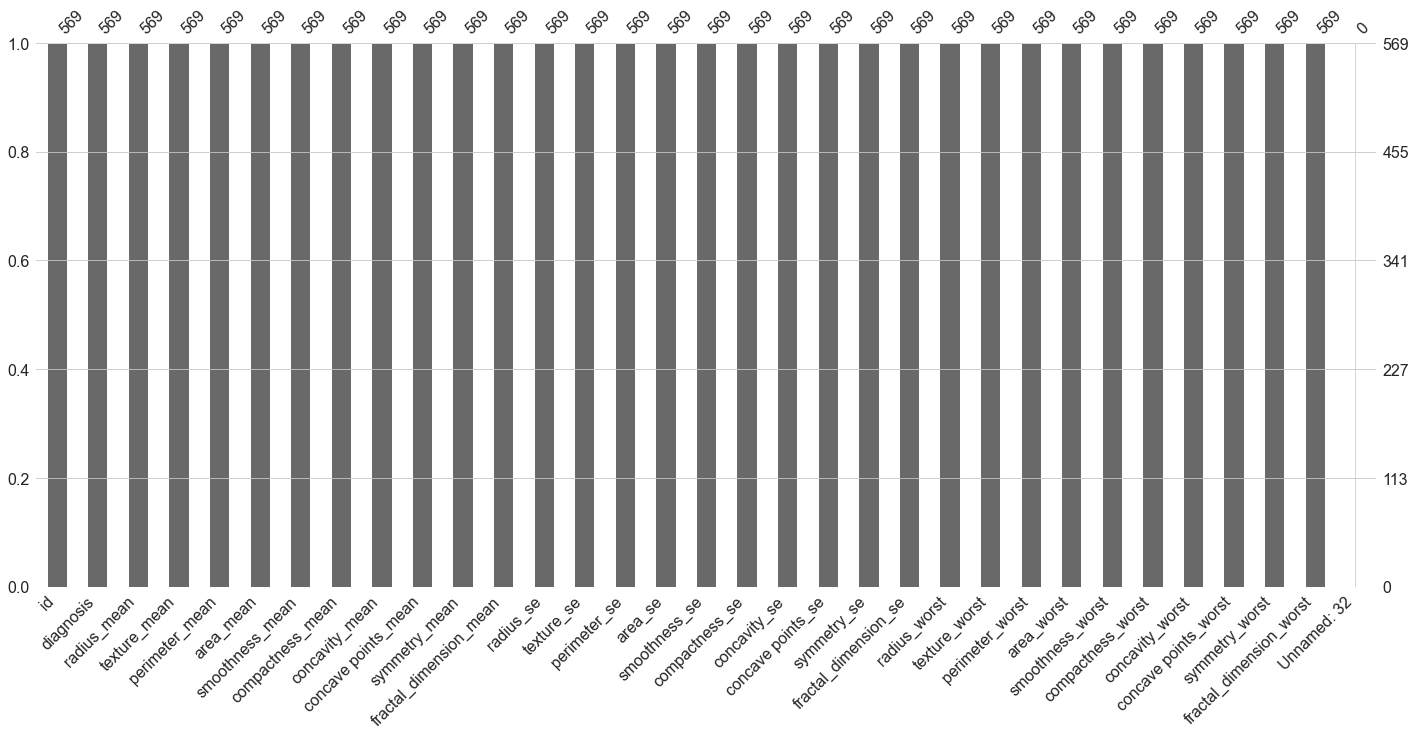

In [6]:
msno.bar(df)

In [7]:
# delete the "Unnamed: 32" column sine it contains no values
del df['Unnamed: 32']

### Univariate Data Analysis
<br>

##### Descriptive statistics of the whole dataset
<br>

In [8]:
df.drop('id',axis = 1).describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

##### Descriptive statistics of the "Benign" tumor
<br>

In [9]:
df[df['diagnosis'] == 'B'].describe().T

count          mean           std          min  \
id                       357.0  2.654382e+07  1.167397e+08  8913.000000   
radius_mean              357.0  1.214652e+01  1.780512e+00     6.981000   
texture_mean             357.0  1.791476e+01  3.995125e+00     9.710000   
perimeter_mean           357.0  7.807541e+01  1.180744e+01    43.790000   
area_mean                357.0  4.627902e+02  1.342871e+02   143.500000   
smoothness_mean          357.0  9.247765e-02  1.344608e-02     0.052630   
compactness_mean         357.0  8.008462e-02  3.374995e-02     0.019380   
concavity_mean           357.0  4.605762e-02  4.344215e-02     0.000000   
concave points_mean      357.0  2.571741e-02  1.590878e-02     0.000000   
symmetry_mean            357.0  1.741860e-01  2.480676e-02     0.106000   
fractal_dimension_mean   357.0  6.286739e-02  6.747343e-03     0.051850   
radius_se                357.0  2.840824e-01  1.125696e-01     0.111500   
texture_se               357.0  1.220380e+00  5.891797e-01     0.360200   
perimeter_se             357.0  2.000321e+00  7.711692e-01     0.757000   
area_se                  357.0  2.113515e+01  8.843472e+00     6.802000   
smoothness_se            357.0  7.195902e-03  3.060610e-03     0.001713   
compactness_se           357.0  2.143825e-02  1.635151e-02     0.002252   
concavity_se             357.0  2.599674e-02  3.291824e-02     0.000000   
concave points_se        357.0  9.857653e-03  5.708625e-03     0.000000   
symmetry_se              357.0  2.058381e-02  6.998539e-03     0.009539   
fractal_dimension_se     357.0  3.636051e-03  2.938219e-03     0.000895   
radius_worst             357.0  1.337980e+01  1.981368e+00     7.930000   
texture_worst            357.0  2.351507e+01  5.493955e+00    12.020000   
perimeter_worst          357.0  8.700594e+01  1.352709e+01    50.410000   
area_worst               357.0  5.588994e+02  1.636014e+02   185.200000   
smoothness_worst         357.0  1.249595e-01  2.001347e-02     0.071170   
compactness_worst        357.0  1.826725e-01  9.217998e-02     0.027290   
concavity_worst          357.0  1.662377e-01  1.403677e-01     0.000000   
concave points_worst     357.0  7.444434e-02  3.579737e-02     0.000000   
symmetry_worst           357.0  2.702459e-01  4.174477e-02     0.156600   
fractal_dimension_worst  357.0  7.944207e-02  1.380405e-02     0.055210   

                                   25%            50%           75%  \
id                       874662.000000  908916.000000  8.812816e+06   
radius_mean                  11.080000      12.200000  1.337000e+01   
texture_mean                 15.150000      17.390000  1.976000e+01   
perimeter_mean               70.870000      78.180000  8.610000e+01   
area_mean                   378.200000     458.400000  5.511000e+02   
smoothness_mean               0.083060       0.090760  1.007000e-01   
compactness_mean              0.055620       0.075290  9.755000e-02   
concavity_mean                0.020310       0.037090  5.999000e-02   
concave points_mean           0.015020       0.023440  3.251000e-02   
symmetry_mean                 0.158000       0.171400  1.890000e-01   
fractal_dimension_mean        0.058530       0.061540  6.576000e-02   
radius_se                     0.207300       0.257500  3.416000e-01   
texture_se                    0.795900       1.108000  1.492000e+00   
perimeter_se                  1.445000       1.851000  2.388000e+00   
area_se                      15.260000      19.630000  2.503000e+01   
smoothness_se                 0.005212       0.006530  8.534000e-03   
compactness_se                0.011320       0.016310  2.589000e-02   
concavity_se                  0.010990       0.018400  3.056000e-02   
concave points_se             0.006433       0.009061  1.187000e-02   
symmetry_se                   0.015600       0.019090  2.406000e-02   
fractal_dimension_se          0.002074       0.002808  4.174000e-03   
radius_worst                 12.080000      13.350000  1.48000

##### Descriptive statistics of the "Malignant" tumor  
<br>

In [10]:
df[df['diagnosis'] == 'M'].describe().T

count          mean           std          min  \
id                       212.0  3.681805e+07  1.378965e+08  8670.000000   
radius_mean              212.0  1.746283e+01  3.203971e+00    10.950000   
texture_mean             212.0  2.160491e+01  3.779470e+00    10.380000   
perimeter_mean           212.0  1.153654e+02  2.185465e+01    71.900000   
area_mean                212.0  9.783764e+02  3.679380e+02   361.600000   
smoothness_mean          212.0  1.028985e-01  1.260824e-02     0.073710   
compactness_mean         212.0  1.451878e-01  5.398750e-02     0.046050   
concavity_mean           212.0  1.607747e-01  7.501933e-02     0.023980   
concave points_mean      212.0  8.799000e-02  3.437391e-02     0.020310   
symmetry_mean            212.0  1.929090e-01  2.763809e-02     0.130800   
fractal_dimension_mean   212.0  6.268009e-02  7.573315e-03     0.049960   
radius_se                212.0  6.090825e-01  3.450386e-01     0.193800   
texture_se               212.0  1.210915e+00  4.831781e-01     0.362100   
perimeter_se             212.0  4.323929e+00  2.568546e+00     1.334000   
area_se                  212.0  7.267241e+01  6.135527e+01    13.990000   
smoothness_se            212.0  6.780094e-03  2.890430e-03     0.002667   
compactness_se           212.0  3.228117e-02  1.838719e-02     0.008422   
concavity_se             212.0  4.182401e-02  2.160343e-02     0.011010   
concave points_se        212.0  1.506047e-02  5.517362e-03     0.005174   
symmetry_se              212.0  2.047240e-02  1.006489e-02     0.007882   
fractal_dimension_se     212.0  4.062406e-03  2.041498e-03     0.001087   
radius_worst             212.0  2.113481e+01  4.283569e+00    12.840000   
texture_worst            212.0  2.931821e+01  5.434804e+00    16.670000   
perimeter_worst          212.0  1.413703e+02  2.945706e+01    85.100000   
area_worst               212.0  1.422286e+03  5.979677e+02   508.100000   
smoothness_worst         212.0  1.448452e-01  2.186983e-02     0.088220   
compactness_worst        212.0  3.748241e-01  1.703720e-01     0.051310   
concavity_worst          212.0  4.506056e-01  1.815067e-01     0.023980   
concave points_worst     212.0  1.822373e-01  4.630779e-02     0.028990   
symmetry_worst           212.0  3.234679e-01  7.468496e-02     0.156500   
fractal_dimension_worst  212.0  9.152995e-02  2.155289e-02     0.055040   

                                   25%            50%           75%  \
id                       861345.000000  895366.500000  8.911290e+06   
radius_mean                  15.075000      17.325000  1.959000e+01   
texture_mean                 19.327500      21.460000  2.376500e+01   
perimeter_mean               98.745000     114.200000  1.299250e+02   
area_mean                   705.300000     932.000000  1.203750e+03   
smoothness_mean               0.094010       0.102200  1.109250e-01   
compactness_mean              0.109600       0.132350  1.724000e-01   
concavity_mean                0.109525       0.151350  2.030500e-01   
concave points_mean           0.064620       0.086280  1.031750e-01   
symmetry_mean                 0.174050       0.189900  2.098500e-01   
fractal_dimension_mean        0.056598       0.061575  6.707500e-02   
radius_se                     0.390375       0.547200  7.573000e-01   
texture_se                    0.892825       1.102500  1.429250e+00   
perimeter_se                  2.715500       3.679500  5.206250e+00   
area_se                      35.762500      58.455000  9.400000e+01   
smoothness_se                 0.005085       0.006209  7.971000e-03   
compactness_se                0.019662       0.028590  3.891000e-02   
concavity_se                  0.026998       0.037125  5.044250e-02   
concave points_se             0.011415       0.014205  1.749750e-02   
symmetry_se                   0.014615       0.017700  2.213250e-02   
fractal_dimension_se          0.002688       0.003739  4.892250e-03   
radius_worst                 17.730000      20.590000  2.38075

#### Column : diagnosis
<br>

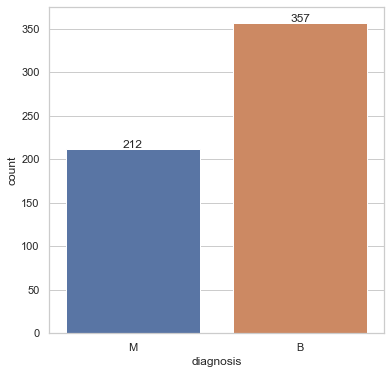

In [11]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(figsize = (6,6))
sns.countplot(x="diagnosis", data=df)
#annotatinos
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

#### <li>About 37.2 % (212) of the total patients (569) are malignant tumor.

#### Check the distribution of the variables
<br>

In [12]:
def plotHistBox(col,hexColor = '#00aeff'):
    fig,ax = plt.subplots(ncols = 2,figsize = (15,4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.7])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    #set figure title
    ax0.set_title('Histplot with KDE estimates')
    ax1.set_title('Boxplot')
    sns.histplot(df[col], kde=True,color = hexColor,ax = ax0)
    #sns.kdeplot(df[col], color="red")
    sns.boxplot(x=df[col],color = hexColor,ax = ax1)
    fig.suptitle(f'Column : {col}', fontsize=16)
    

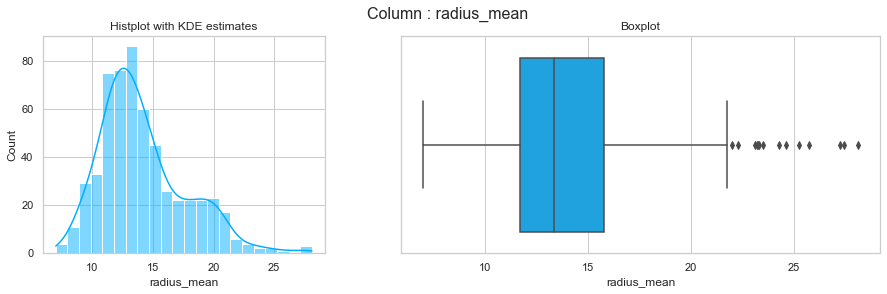

In [13]:
plotHistBox('radius_mean')

C:\Users\DK BORBORAH\conda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


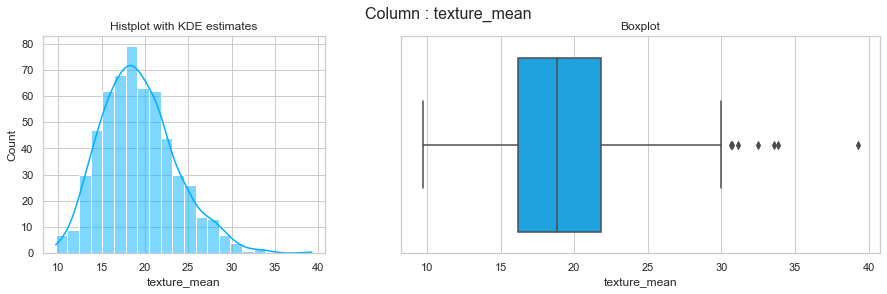

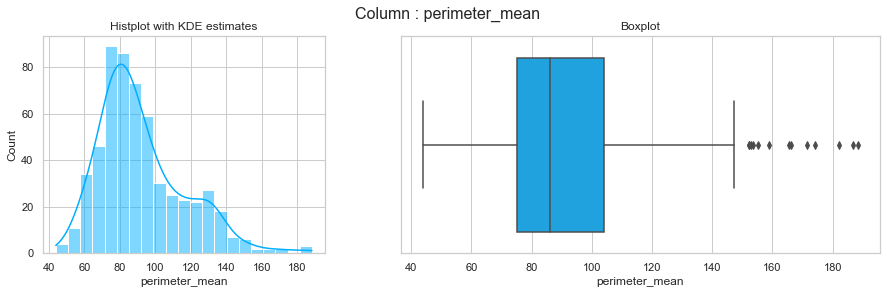

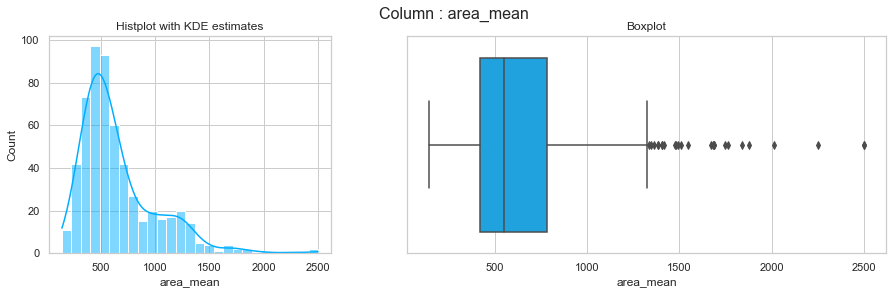

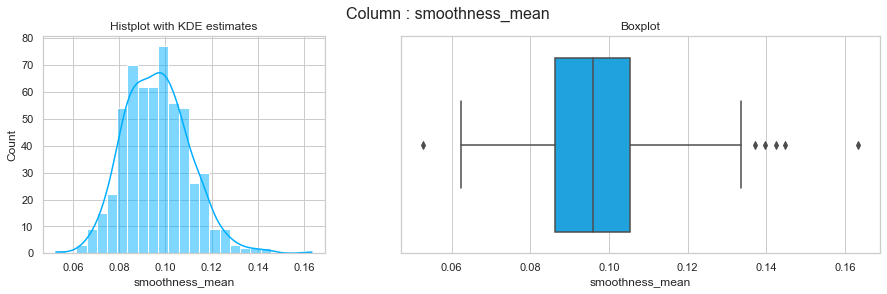

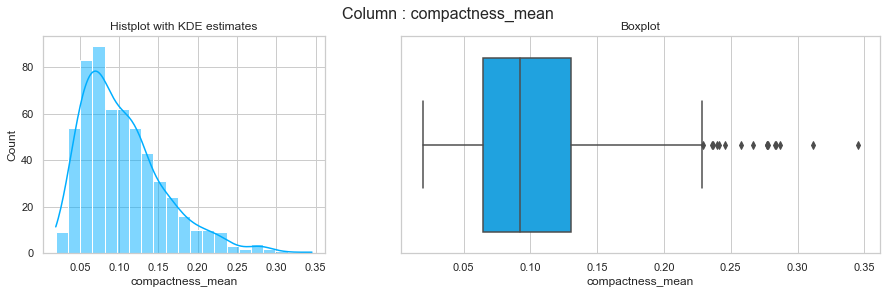

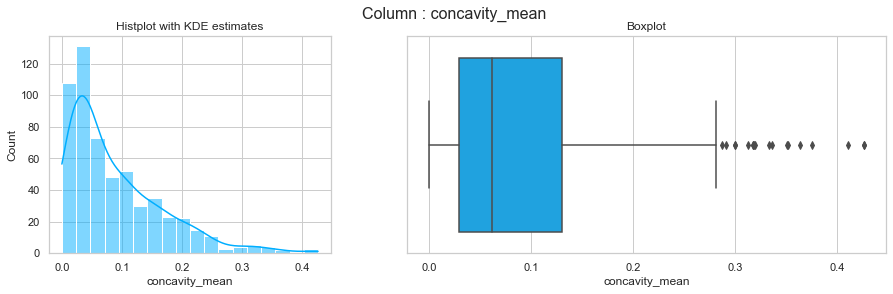

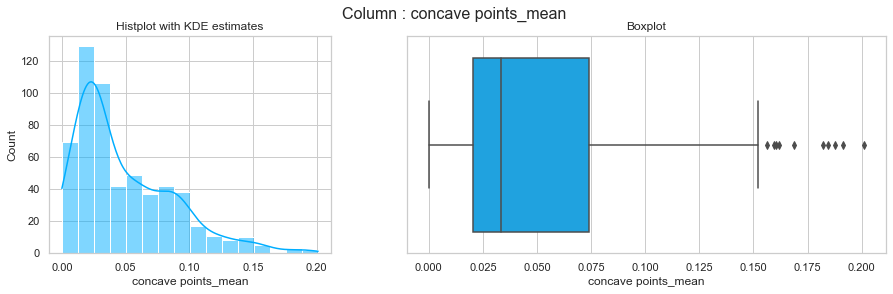

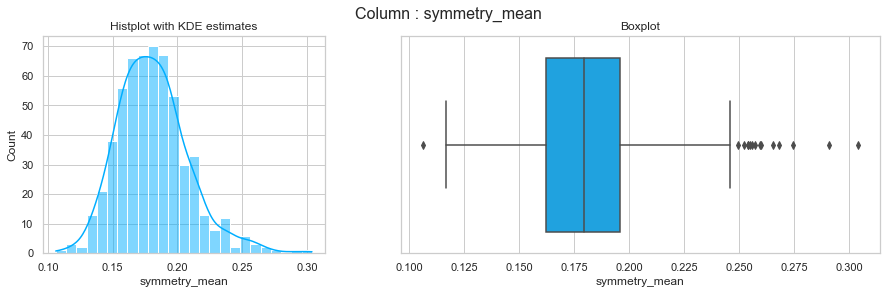

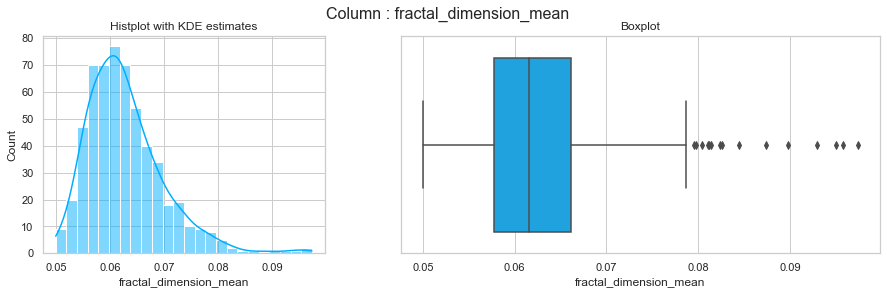

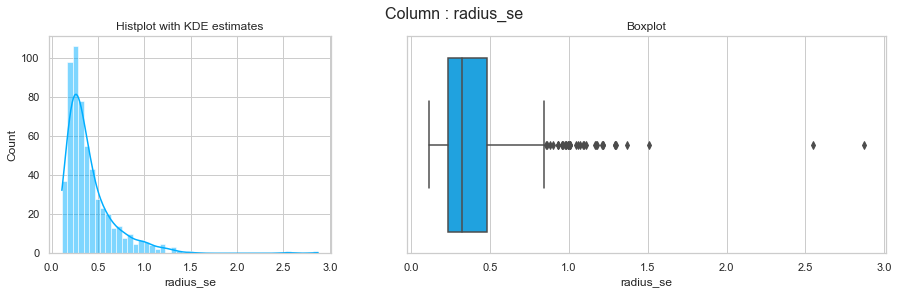

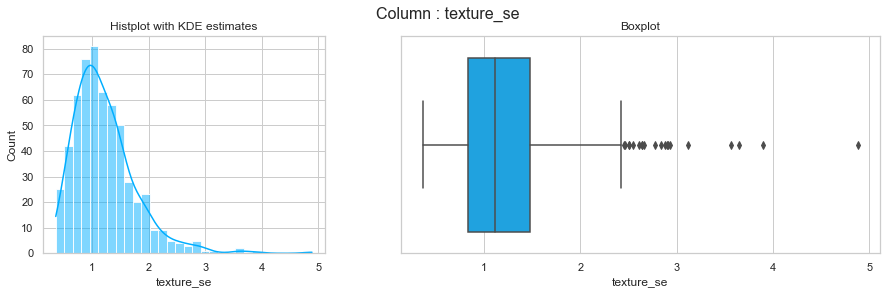

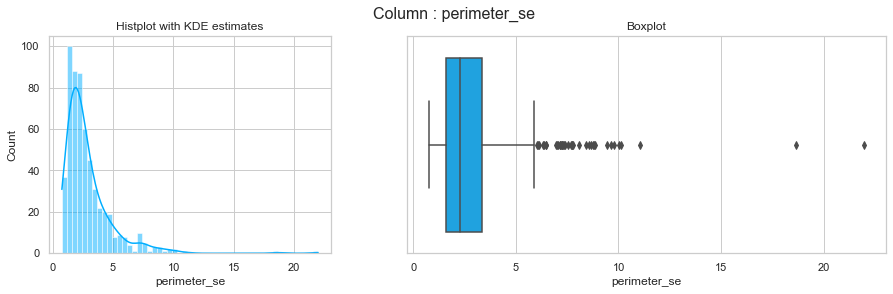

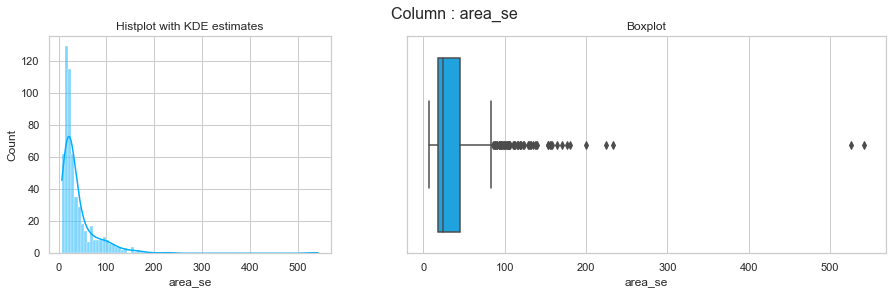

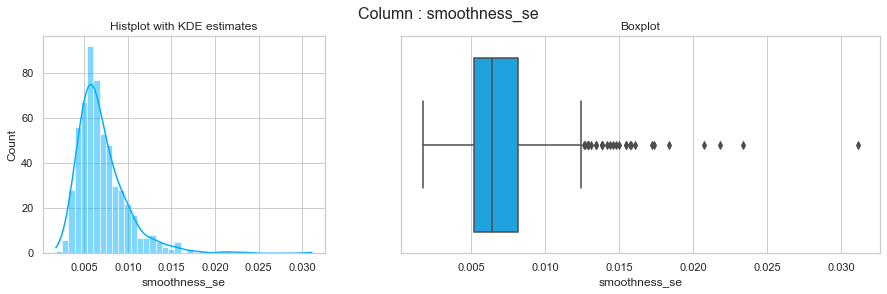

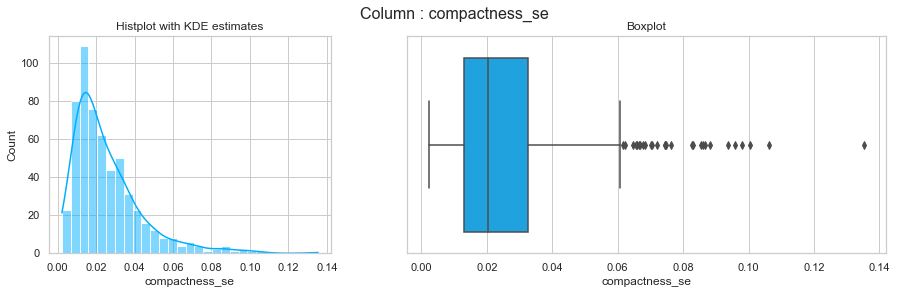

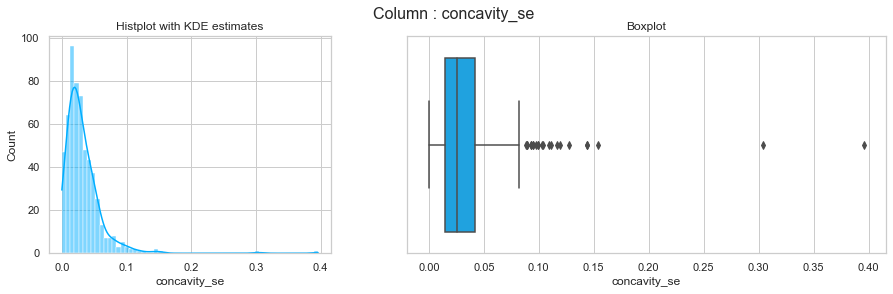

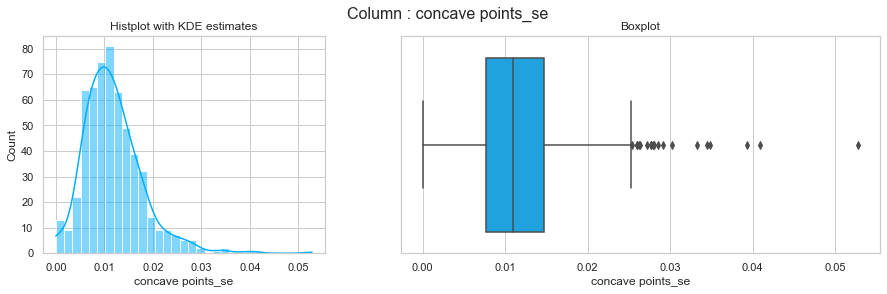

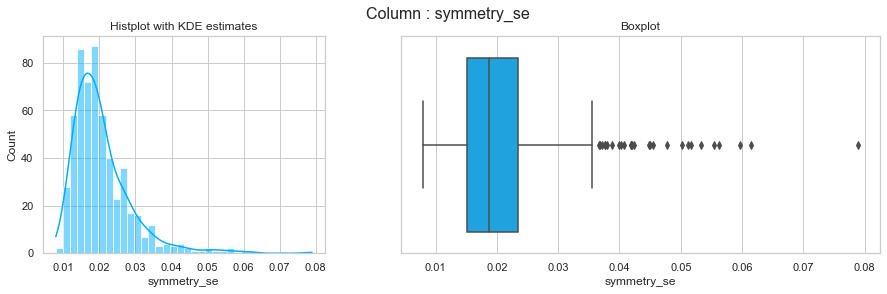

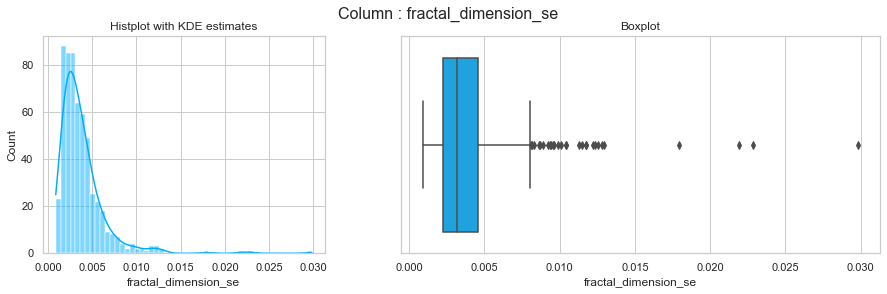

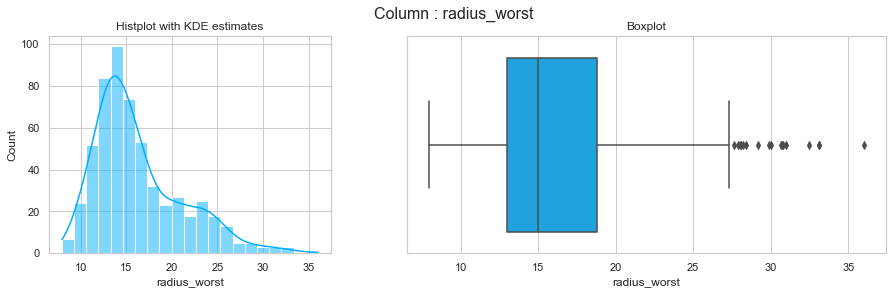

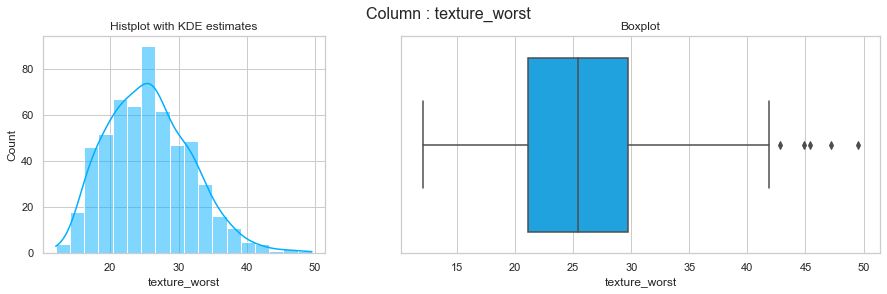

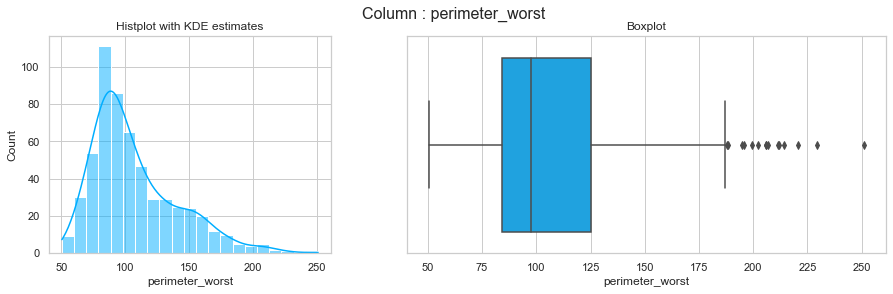

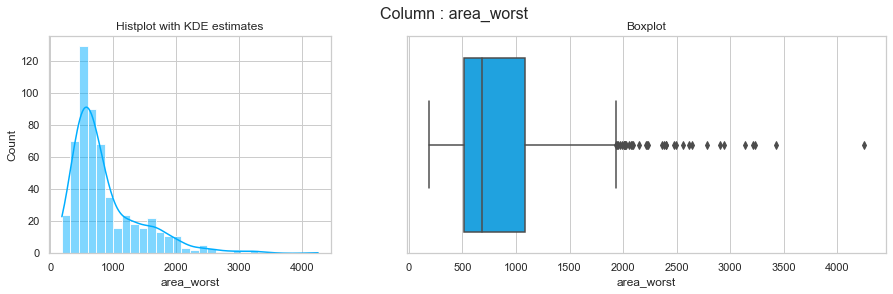

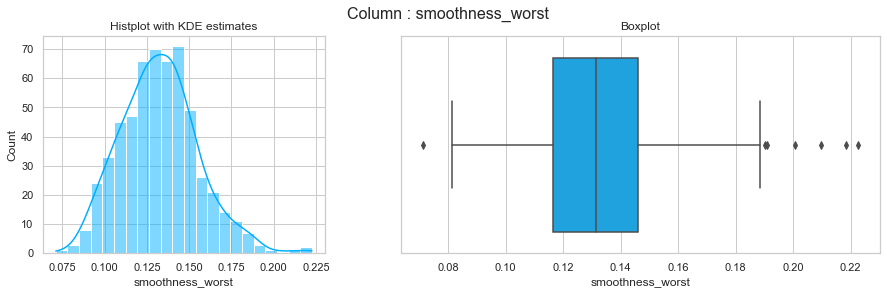

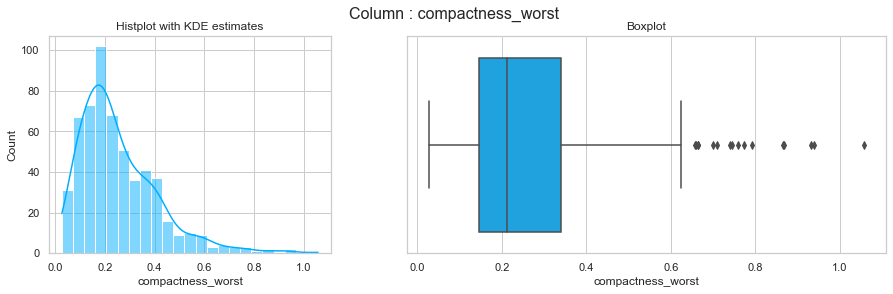

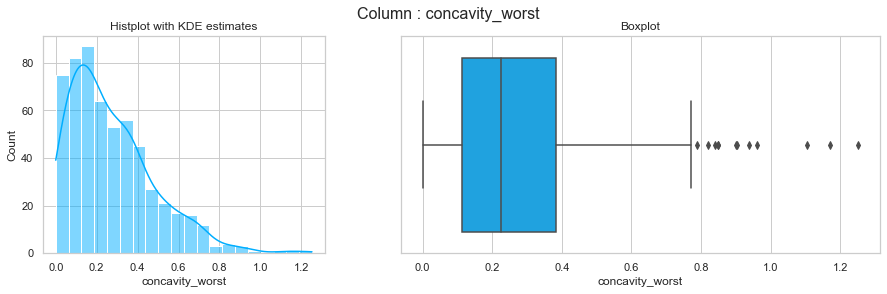

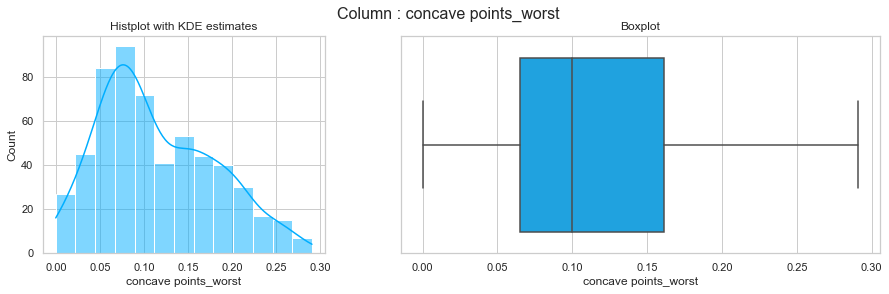

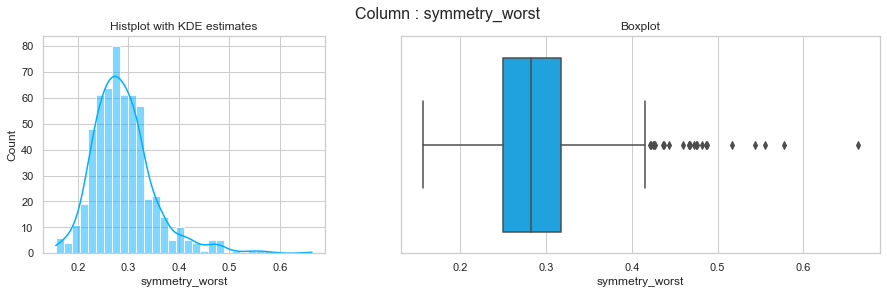

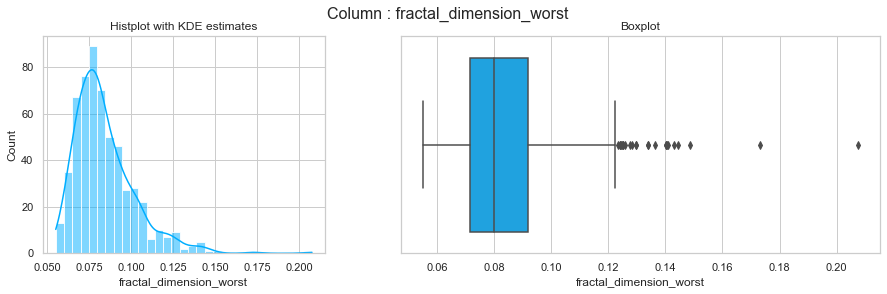

In [14]:
for col in df.columns[3:]:
    plotHistBox(col)

#### Check the skewness and kurtosis of the columns
<br>

In [15]:
kurtSkewDict = {
    "Skewness" : df.skew()[1:].values,
    "Kurtosis" : df.kurt()[1:].values,
}


The Gaussian distibution has a Skewness of 0 and Kurtosis of 3<br>
Let's check the skewness and kurtosis of the variables

In [16]:
#create a dataFrame for the Skewness and Kurtosis
kurtSkewFrame = pd.DataFrame(data=kurtSkewDict,index = df.columns[2:])
kurtSkewFrame

Skewness   Kurtosis
radius_mean              0.942380   0.845522
texture_mean             0.650450   0.758319
perimeter_mean           0.990650   0.972214
area_mean                1.645732   3.652303
smoothness_mean          0.456324   0.855975
compactness_mean         1.190123   1.650130
concavity_mean           1.401180   1.998638
concave points_mean      1.171180   1.066556
symmetry_mean            0.725609   1.287933
fractal_dimension_mean   1.304489   3.005892
radius_se                3.088612  17.686726
texture_se               1.646444   5.349169
perimeter_se             3.443615  21.401905
area_se                  5.447186  49.209077
smoothness_se            2.314450  10.469840
compactness_se           1.902221   5.106252
concavity_se             5.110463  48.861395
concave points_se        1.444678   5.126302
symmetry_se              2.195133   7.896130
fractal_dimension_se     3.923969  26.280847
radius_worst             1.103115   0.944090
texture_worst            0.498321   0.224302
perimeter_worst          1.128164   1.070150
area_worst               1.859373   4.396395
smoothness_worst         0.415426   0.517825
compactness_worst        1.473555   3.039288
concavity_worst          1.150237   1.615253
concave points_worst     0.492616  -0.535535
symmetry_worst           1.433928   4.444560
fractal_dimension_worst  1.662579   5.244611


### Bivariate Analysis
<br>

#### Check the distribution of the variables with respect to target 
<br>

In [17]:
def plotHistBoxBi(col):
    fig,ax = plt.subplots(ncols = 2,figsize = (15,4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.5])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    #set figure title
    ax0.set_title('Histplots')
    ax1.set_title('Boxplots')
    sns.histplot(data = df,x = col,hue= 'diagnosis',ax = ax0)
    #sns.kdeplot(df[col], color="red")
    sns.boxplot(data =df,x=col,y = 'diagnosis',hue= 'diagnosis',ax = ax1)
    fig.suptitle(f'Column : {col}', fontsize=16)

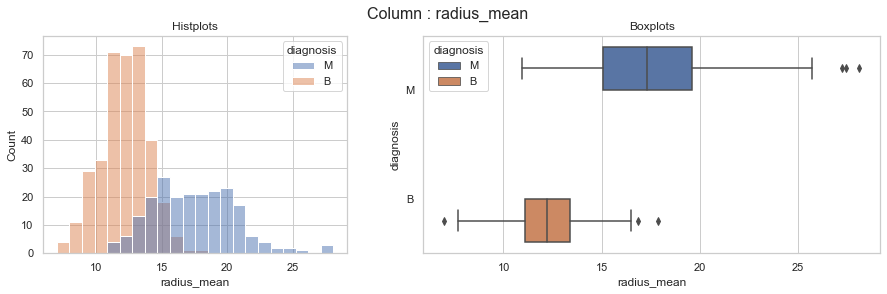

In [18]:
plotHistBoxBi('radius_mean')

C:\Users\DK BORBORAH\conda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


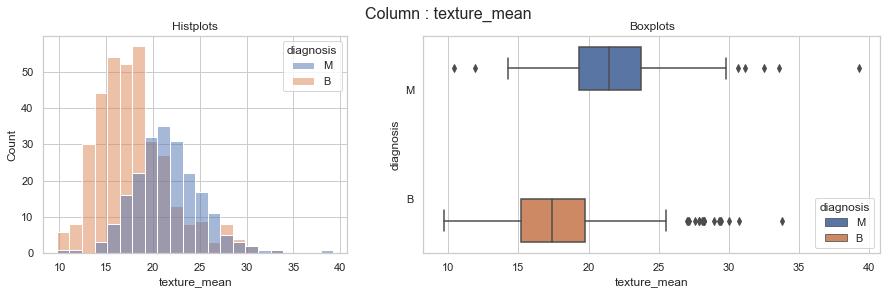

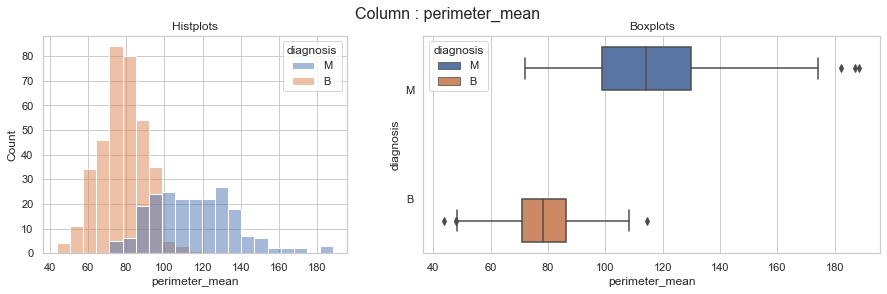

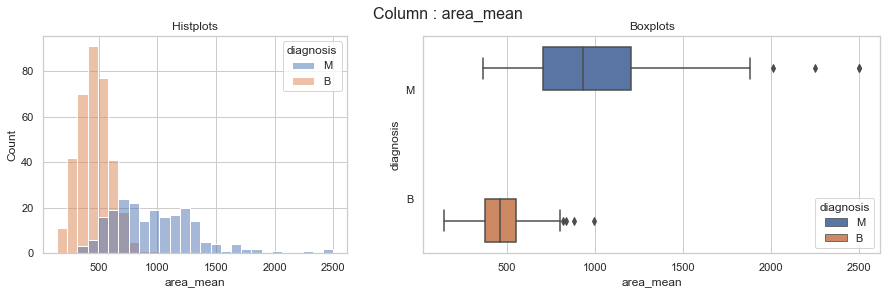

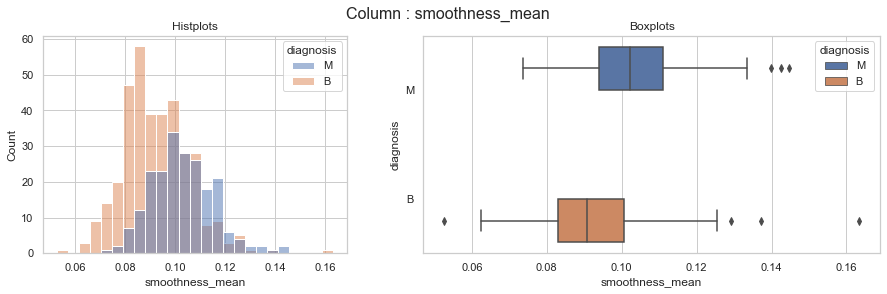

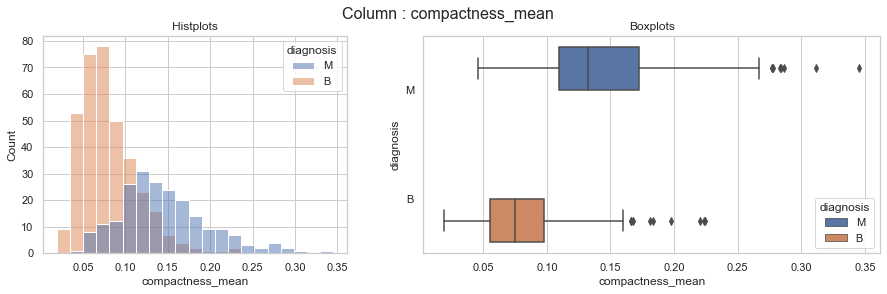

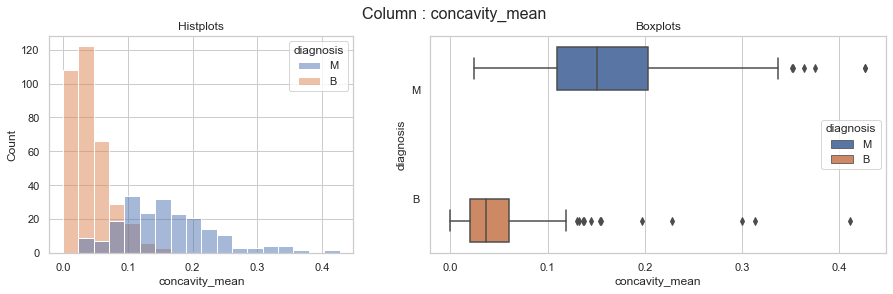

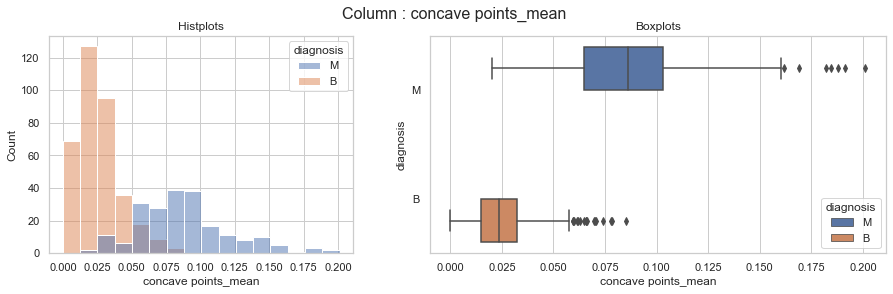

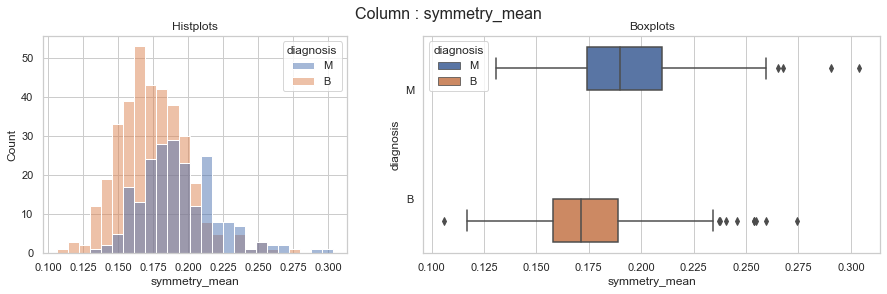

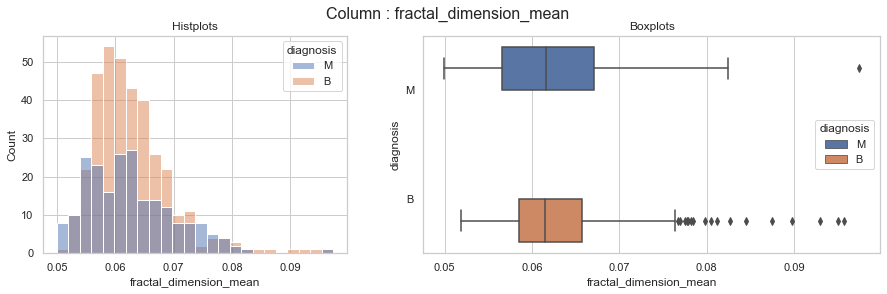

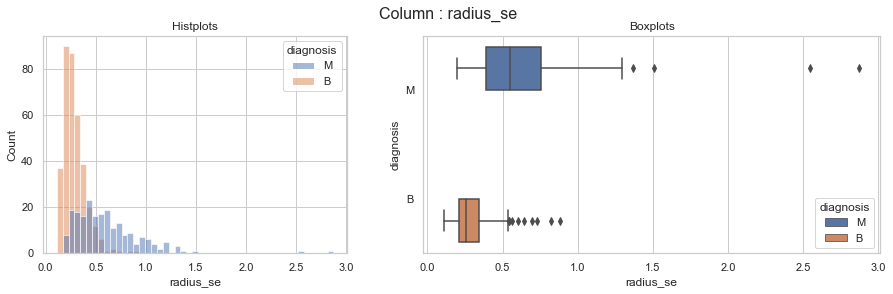

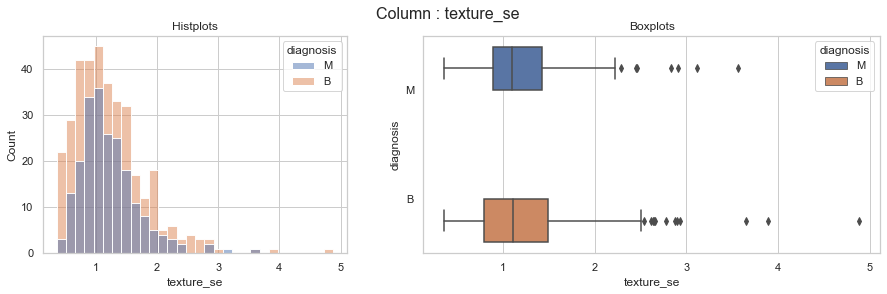

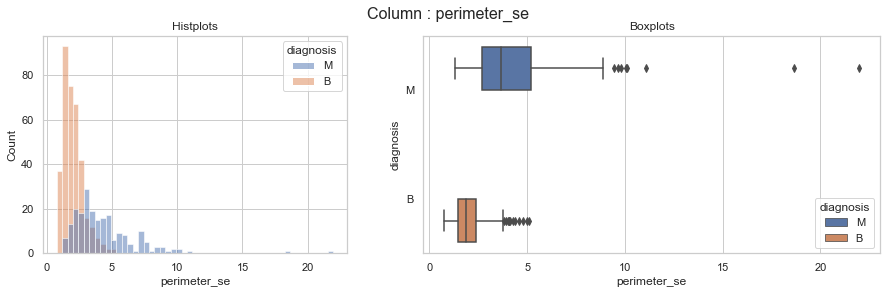

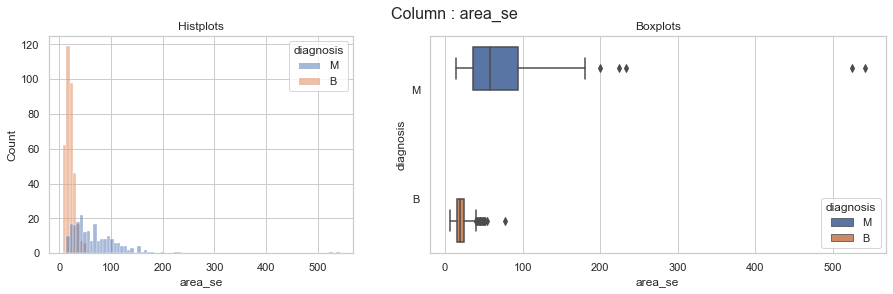

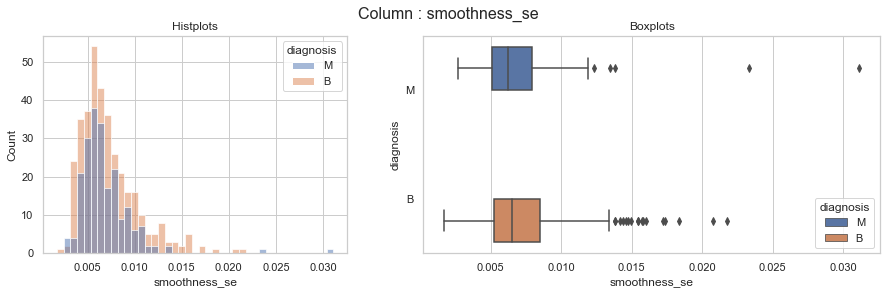

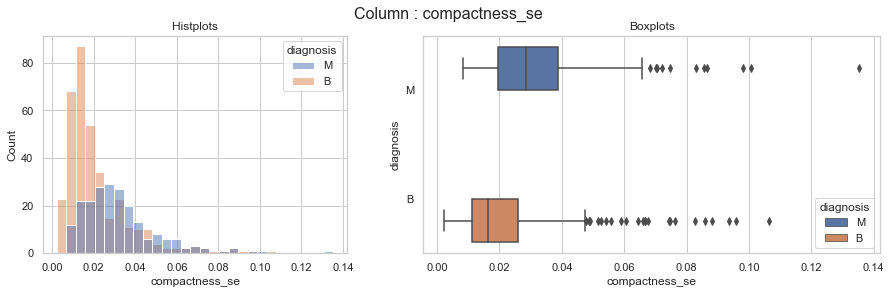

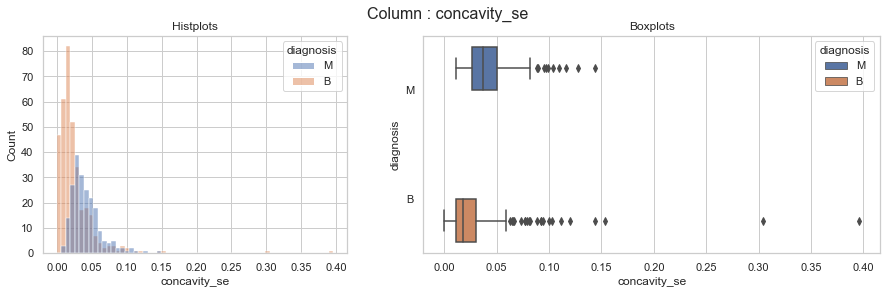

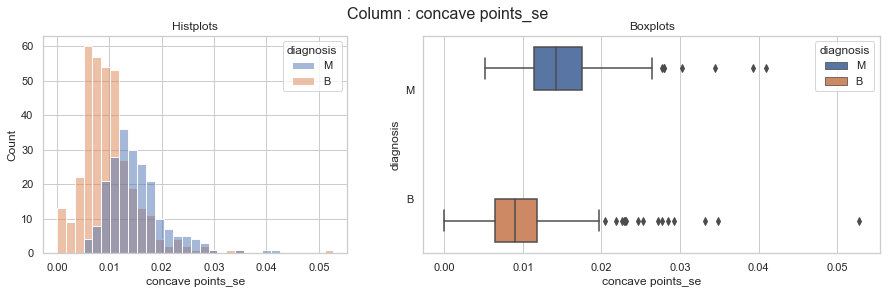

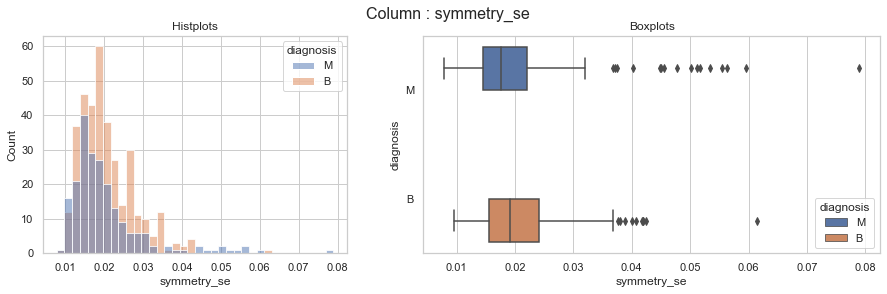

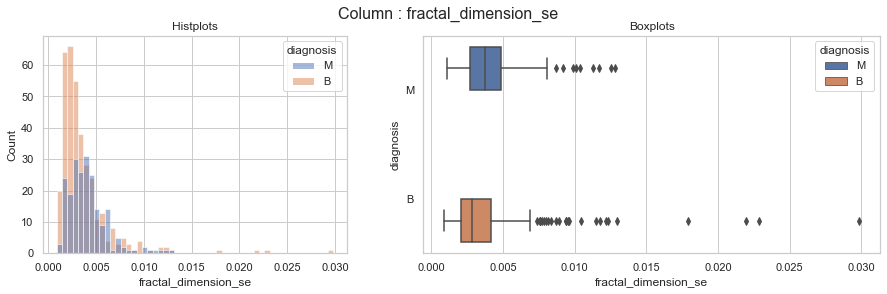

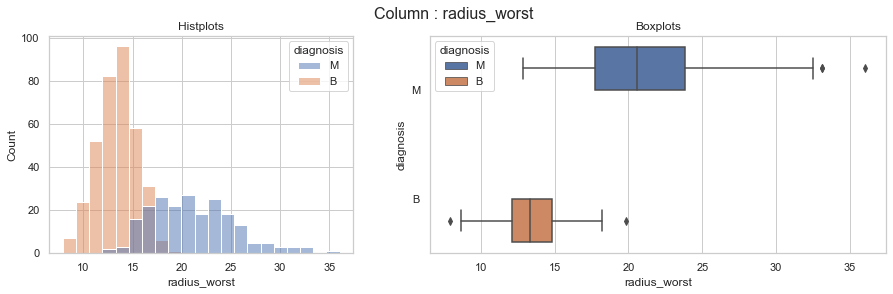

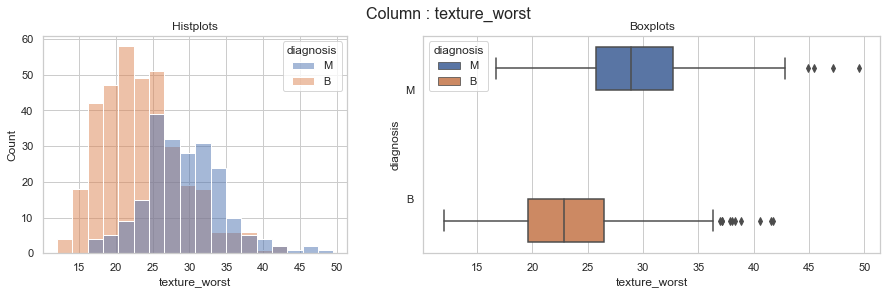

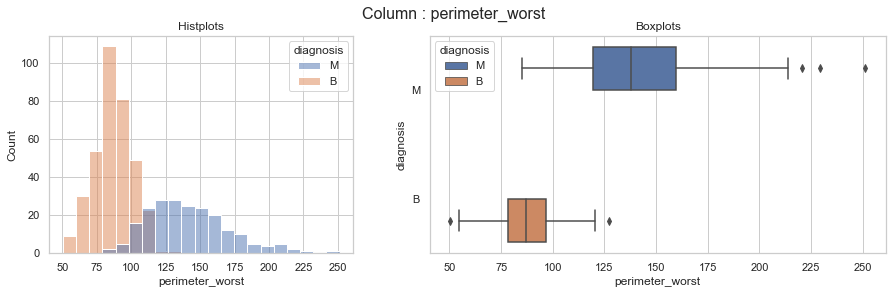

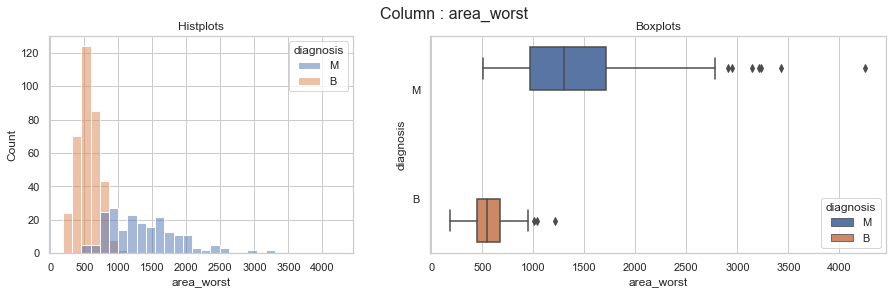

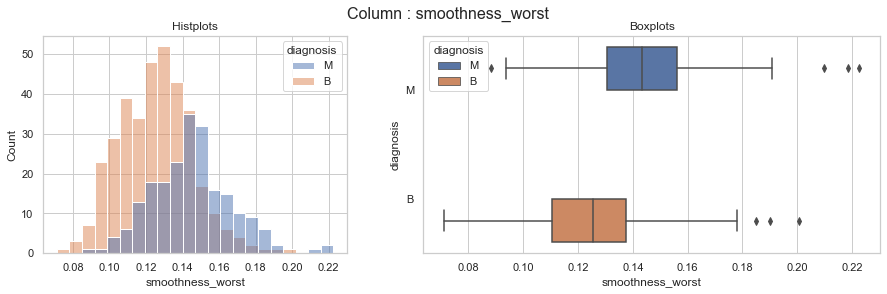

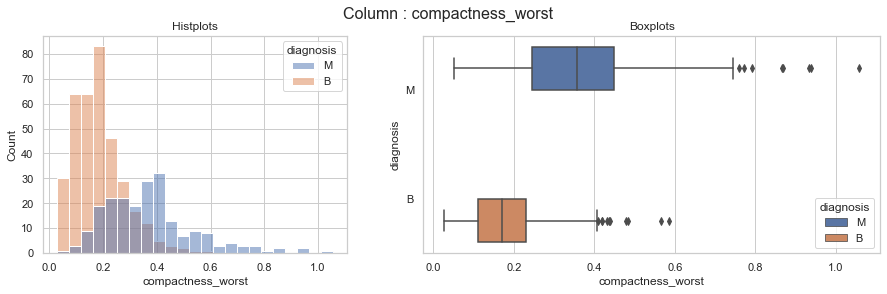

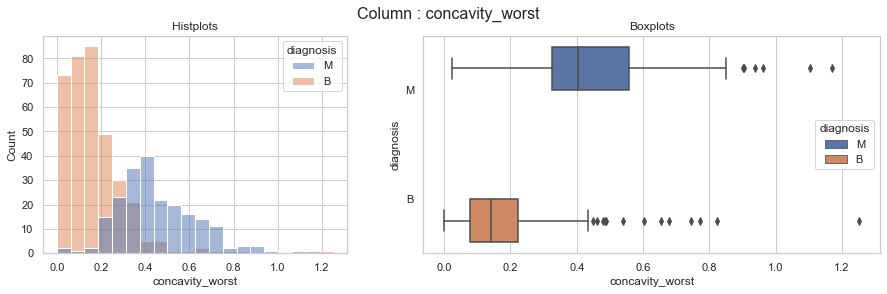

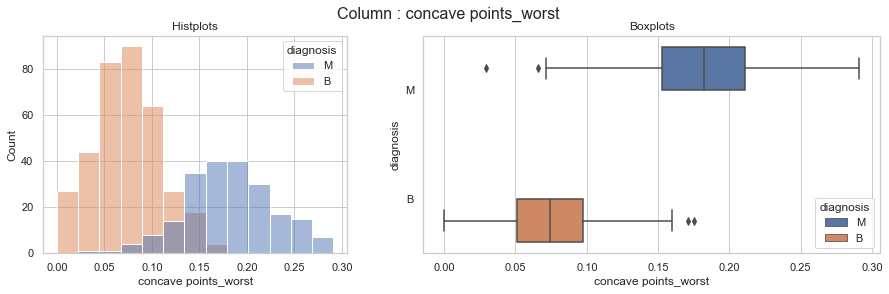

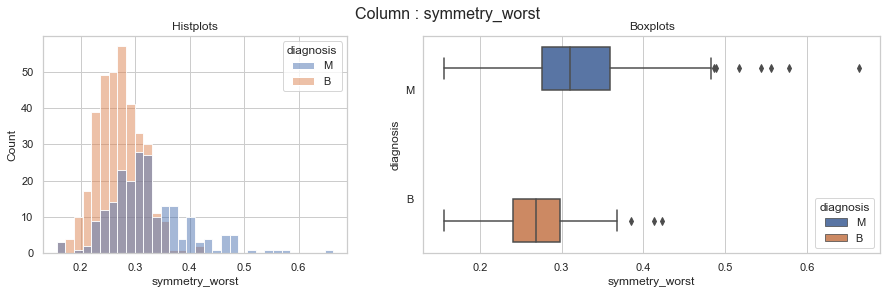

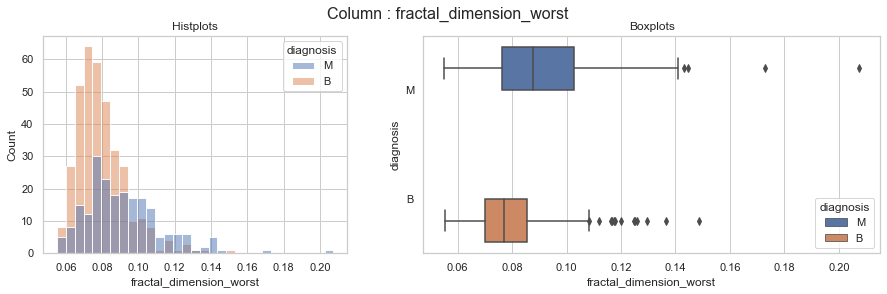

In [19]:
for col in df.columns[3:]:
    plotHistBoxBi(col)

#### Check the correlation

In [20]:
#create a class to return the top correlated features and also plot them
class correlationInfo():
    
    def __init__(self,col):
        self.col = col
        self.corrFrame = df[df.columns[2:]].corr()[self.col].sort_values(ascending = False)[1:].head(9)
        
    def corrVal(self):
        corrFrame = self.corrFrame.to_frame()
        corrFrame.columns = ['Correlation_values']
        print(f'Top nine features most correlatd to {col}')
        return corrFrame
    
    def correlationPlot(self):
        #grab the top nine most correlated attributes with the col
        corrCol = self.corrFrame.index
        fig,ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
        nrow = 0
        ncol = 0
        for cor_col in corrCol:
            sns.scatterplot(data=df, x=self.col, y=cor_col, hue="diagnosis", size="diagnosis",ax = ax[nrow,ncol])
            ncol += 1
            if ncol ==3:
                nrow +=1
                ncol =0
        fig.suptitle(f'Top 9 most correated features with {self.col}',size = 16)        
    
        

In [21]:
correlationInfo('radius_mean').corrVal()

Top nine features most correlatd to fractal_dimension_worst


Correlation_values
perimeter_mean                  0.997855
area_mean                       0.987357
radius_worst                    0.969539
perimeter_worst                 0.965137
area_worst                      0.941082
concave points_mean             0.822529
concave points_worst            0.744214
area_se                         0.735864
radius_se                       0.679090

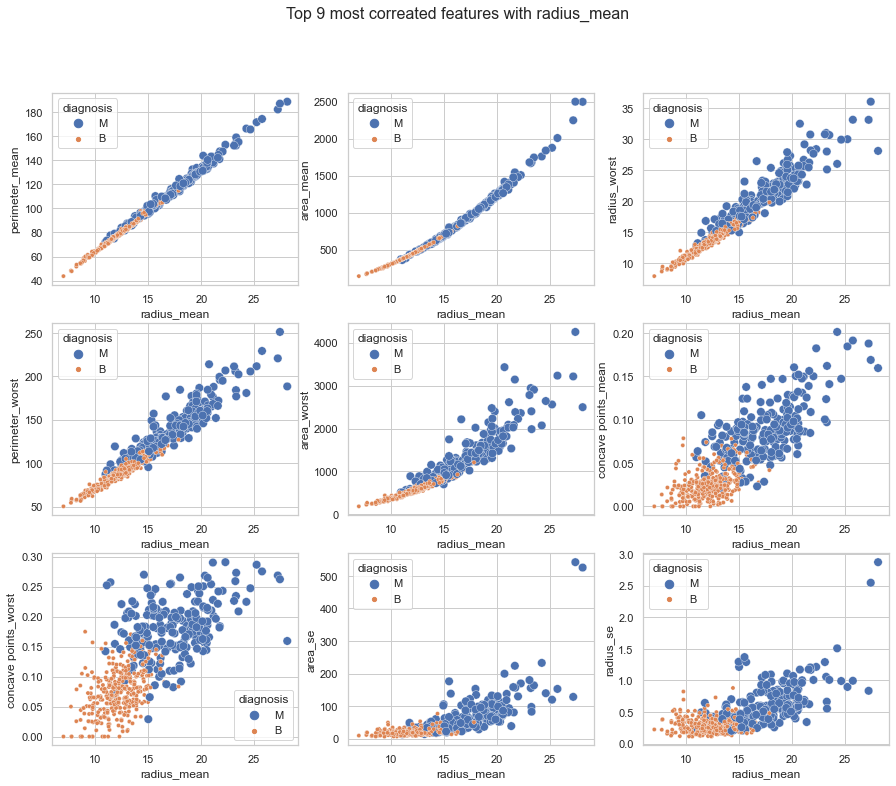

In [22]:
correlationInfo('radius_mean').correlationPlot()

In [23]:
correlationInfo('symmetry_worst').corrVal()

Top nine features most correlatd to fractal_dimension_worst


Correlation_values
symmetry_mean                      0.699826
compactness_worst                  0.614441
fractal_dimension_worst            0.537848
concavity_worst                    0.532520
compactness_mean                   0.510223
concave points_worst               0.502528
smoothness_worst                   0.493838
concavity_mean                     0.409464
smoothness_mean                    0.394309

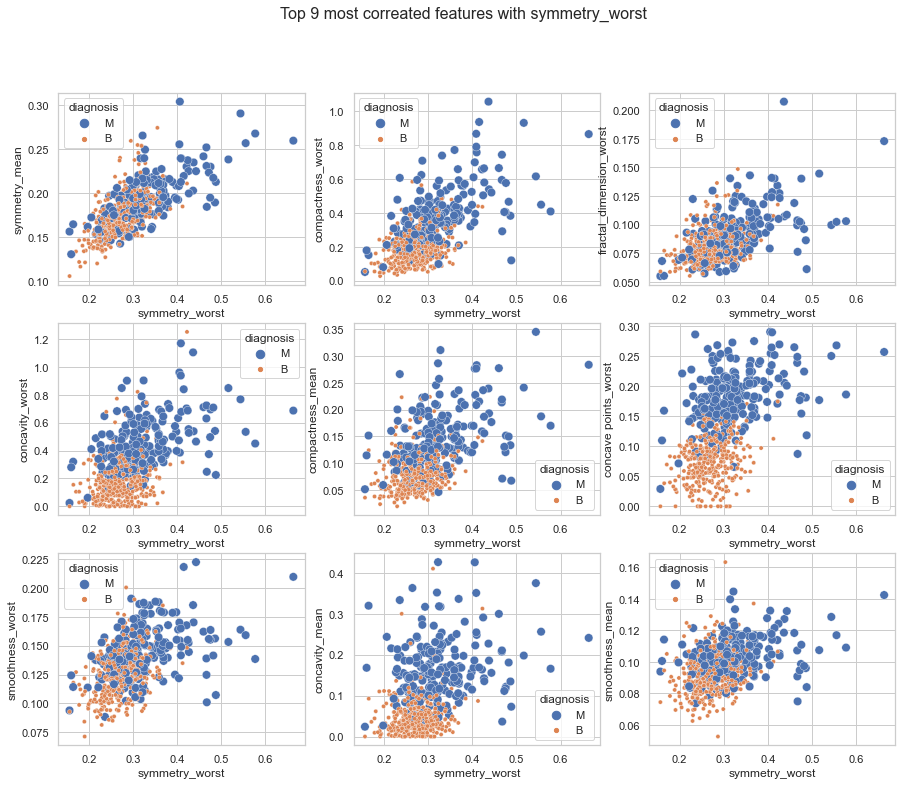

In [24]:
correlationInfo('symmetry_worst').correlationPlot()

##### You can plot as check for as many features you want!!!
<br>

### Multivariat Data Analysis

In [25]:
#change the label of the target variables
df['diagnosis_e'] = df['diagnosis'].replace(['M'],1)
df['diagnosis_e'] = df['diagnosis_e'].replace(['B'],0)

In [26]:
print('The top nine features most correlated with Malignant tumor is ')
df.corr()['diagnosis_e'].sort_values(ascending = False)[1:].head(9)

The top nine features most correlated with Malignant tumor is 


concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis_e, dtype: float64

Pair plot of the top features with most correlation with the target (part-1)


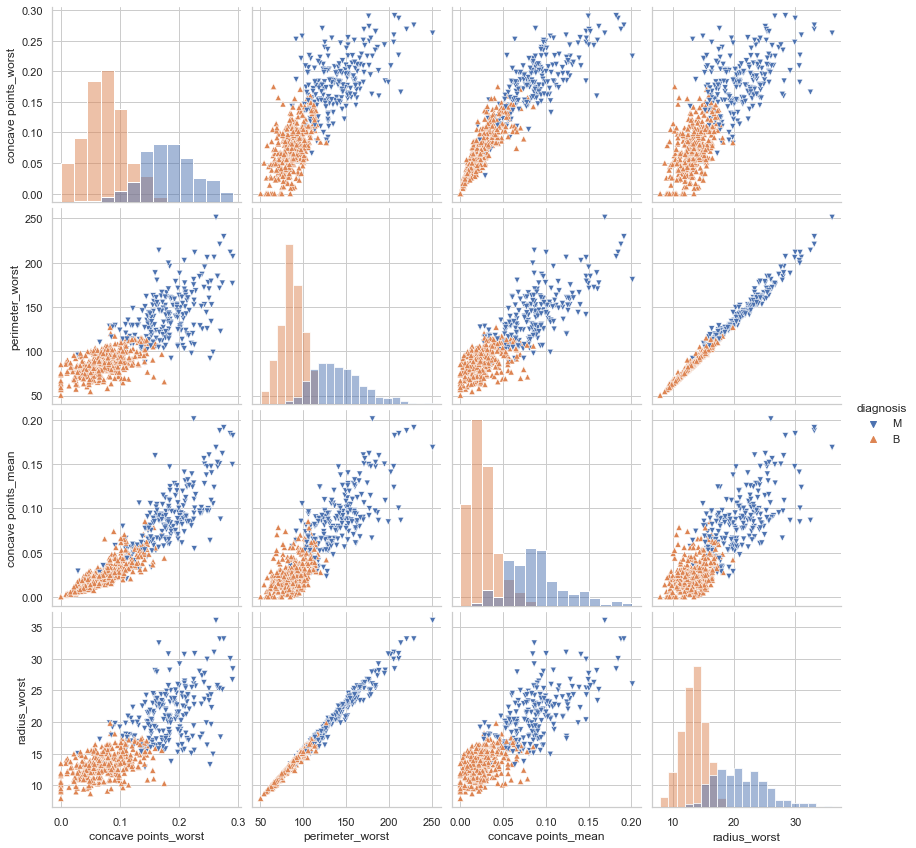

In [27]:
print("Pair plot of the top features with most correlation with the target (part-1)")
sns.pairplot(df,vars = df.corr()
             ['diagnosis_e'].sort_values(ascending = False)[1:].head(4).index,
             hue="diagnosis",diag_kind="hist",height=3,markers=['v', '^'])

Pair plot of the top features with most correlation with the target (part-2)


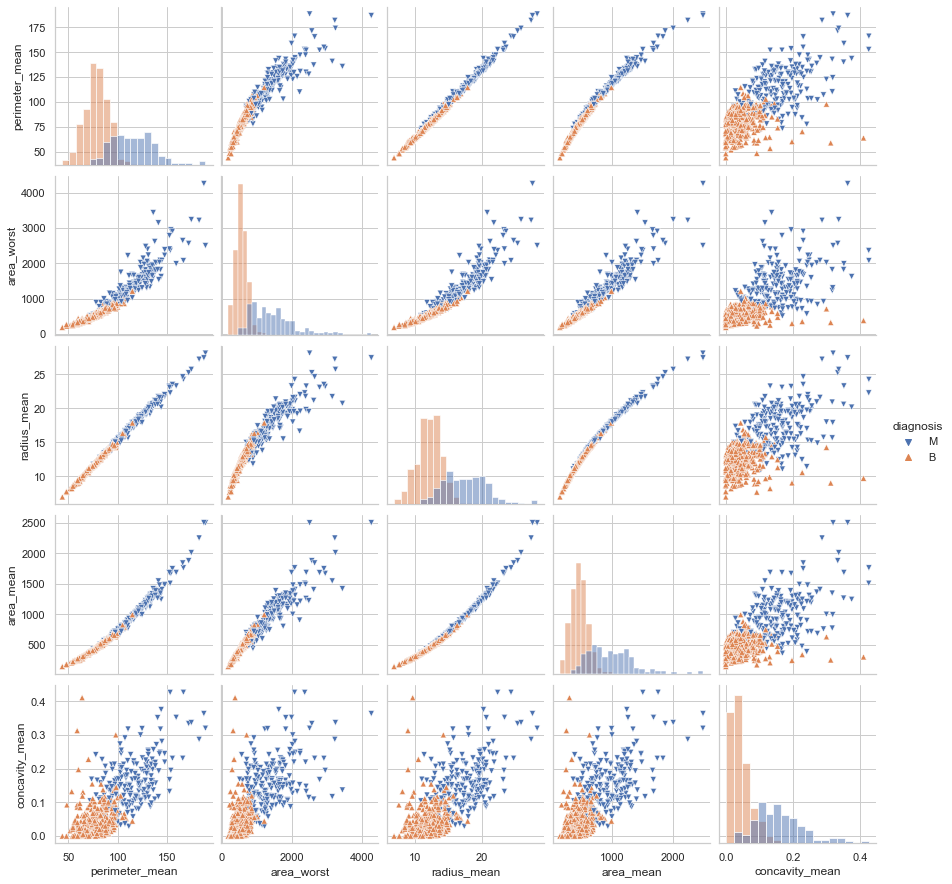

In [28]:
print("Pair plot of the top features with most correlation with the target (part-2)")
sns.pairplot(df,vars = df.corr()
             ['diagnosis_e'].sort_values(ascending = False)[1:][4:9].index,
             hue="diagnosis",diag_kind="hist",markers=['v', '^'])

### Variable transformation (if necesary)
<br>
<li>We will now access if the variables are normally distributed or not.We will use the Q-Q plot
<li>We will also do the Shapiro-Wilk test. The Shapiro-Wilk test assumes a null hypothesis that the data is normally           distributed. If the p-value of the test is greater than 0.05 we will accept the null hypothesis. If it is less than that we will reject the null hypothesis in favour of the alternate hpothesis (that the data is not normally distributed)  

In [29]:
def normality_plot(df, col):
    fig,ax = plt.subplots(figsize = (6,4))
    stats.probplot(df[col], dist="norm",plot =ax)
    fig.suptitle(f'Quantile-Quantile plot for {col}')
    p = shapiro(df[col]).pvalue
    print(f'P-value of {col} is {p}')
    if p > 0.05:
        print('The distribution is approximately Gaussian. We can accept the null hypothesis')
    else:
        print("The distribution dosen\'t look Gaussian. We can\'t accept the null hypothesis")
    plt.show()

In [30]:
colTransform = df.columns[2:-1]

P-value of radius_mean is 3.1061551985026026e-14
The distribution dosen't look Gaussian. We can't accept the null hypothesis


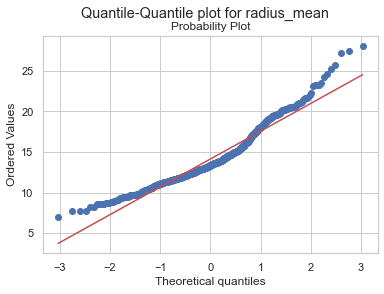

P-value of texture_mean is 7.281473557441132e-08
The distribution dosen't look Gaussian. We can't accept the null hypothesis


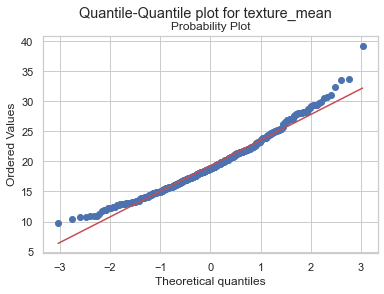

P-value of perimeter_mean is 7.01163031715385e-15
The distribution dosen't look Gaussian. We can't accept the null hypothesis


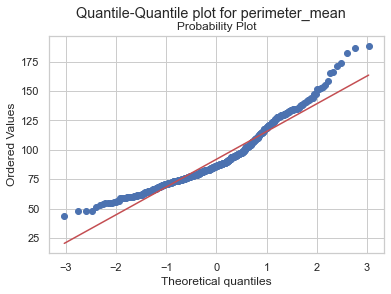

P-value of area_mean is 3.196511088521129e-22
The distribution dosen't look Gaussian. We can't accept the null hypothesis


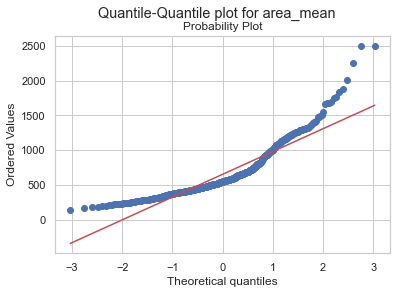

In [31]:
for i in range(4):
    normality_plot(df,colTransform[i])

Looks the most of our variables are not normal.
<br>

In [32]:
def normalityTest(df,col):
    p = shapiro(df[col]).pvalue
    if p > 0.05:
        return True
        print("Accept Null Hypothesis")
    else:
        print('Failed to accept null Hypothesis')
        return False

Since none of the columns are normally distributed, we first apply Log-Transformation and check if its now approximately normal.if not then we will apply other other transformations
<br>


In [33]:
# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(
            df.drop(['id', 'diagnosis','diagnosis_e'], axis=1),
            df['diagnosis_e'], test_size=0.3, random_state=69)

In [34]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[0])
# fit the transformer
tf.fit(X_train)

BoxCoxTransformer(variables='radius_mean')

In [35]:
# transform the data
train_t= tf.transform(X_train)
test_t= tf.transform(X_test)

P-value of radius_mean is 0.06210581958293915
The distribution is approximately Gaussian. We can accept the null hypothesis


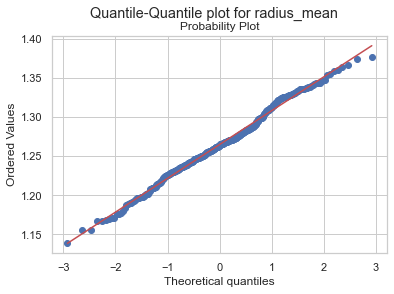

In [36]:
normality_plot(train_t,colTransform[0])

In [37]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[1])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

P-value of texture_mean is 0.9933956861495972
The distribution is approximately Gaussian. We can accept the null hypothesis


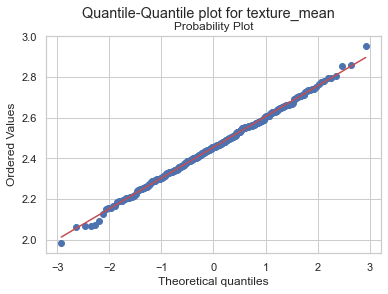

In [38]:
normality_plot(train_t,colTransform[1])

P-value of perimeter_mean is 0.07987645268440247
The distribution is approximately Gaussian. We can accept the null hypothesis


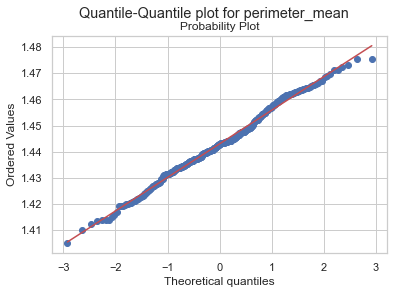

In [39]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[2])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[2])

P-value of area_mean is 0.06172732636332512
The distribution is approximately Gaussian. We can accept the null hypothesis


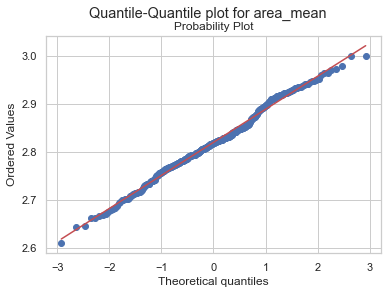

In [40]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[3])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[3])

P-value of smoothness_mean is 0.8624048829078674
The distribution is approximately Gaussian. We can accept the null hypothesis


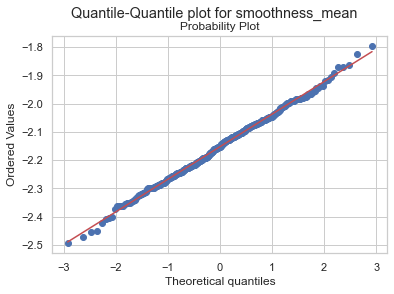

In [41]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[4])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[4])

P-value of compactness_mean is 0.17573429644107819
The distribution is approximately Gaussian. We can accept the null hypothesis


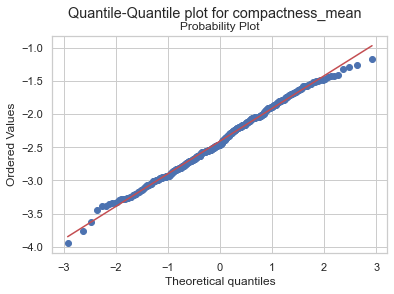

In [42]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[5])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[5])

In [43]:
# set up the variable transformer
tf = vt.PowerTransformer(variables = colTransform[6])
# fit the transformer
tf.fit(train_t)

PowerTransformer(variables='concavity_mean')

P-value of concavity_mean is 4.347838057583431e-06
The distribution dosen't look Gaussian. We can't accept the null hypothesis


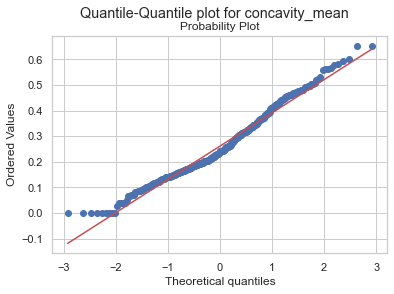

In [44]:
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)
#plot he data and check
normality_plot(train_t,colTransform[6])

In the case of "Concavity mean" we can't apply the Log-Transformation,Reciprocal Transformation and Box-Cox Transformation. This is the closest we can approximate with the Exponential transformation.

P-value of concave points_mean is 2.1670420125019518e-08
The distribution dosen't look Gaussian. We can't accept the null hypothesis


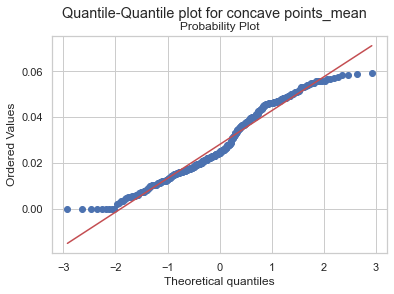

In [45]:
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = colTransform[7])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[7])

In the case of "concave points_mean" we can't apply the Log-Transformation,Reciprocal Transformation and Box-Cox Transformation. This is the closest we can approximate with the Yeo-Johnson transformation.

P-value of concave points_mean is 1.978052921458584e-07
The distribution dosen't look Gaussian. We can't accept the null hypothesis


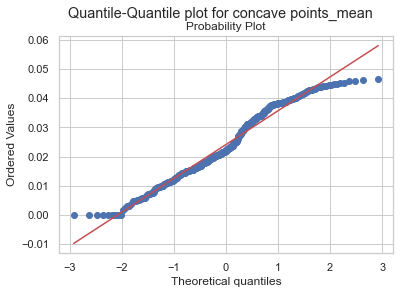

In [46]:
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = colTransform[7])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[7])

P-value of symmetry_mean is 0.3453654646873474
The distribution is approximately Gaussian. We can accept the null hypothesis


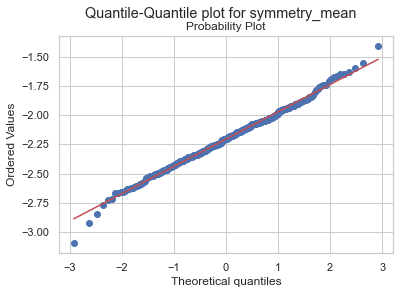

In [47]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[8])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[8])

P-value of fractal_dimension_mean is 0.9204457998275757
The distribution is approximately Gaussian. We can accept the null hypothesis


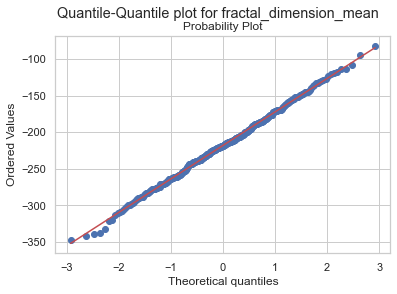

In [48]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[9])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[9])

P-value of radius_se is 0.16996794939041138
The distribution is approximately Gaussian. We can accept the null hypothesis


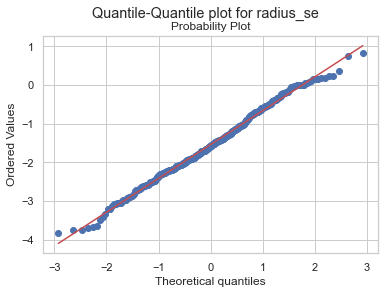

In [49]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[10])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[10])

P-value of texture_se is 0.8776135444641113
The distribution is approximately Gaussian. We can accept the null hypothesis


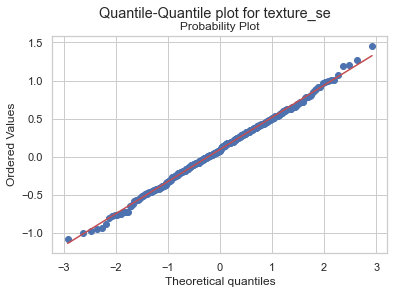

In [50]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[11])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[11])

P-value of perimeter_se is 0.5191929936408997
The distribution is approximately Gaussian. We can accept the null hypothesis


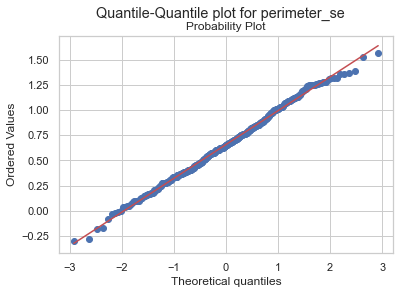

In [51]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[12])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[12])

P-value of area_se is 0.0039971056394279
The distribution dosen't look Gaussian. We can't accept the null hypothesis


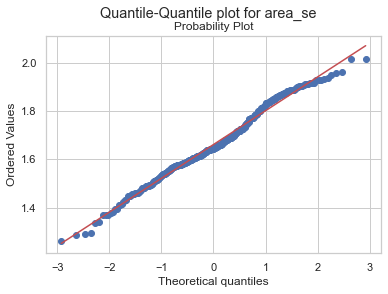

In [52]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[13])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[13])

P-value of smoothness_se is 0.11033758521080017
The distribution is approximately Gaussian. We can accept the null hypothesis


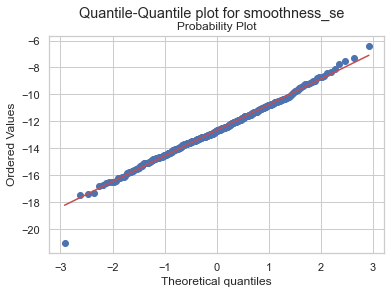

In [53]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[14])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[14])

P-value of compactness_se is 0.3727860748767853
The distribution is approximately Gaussian. We can accept the null hypothesis


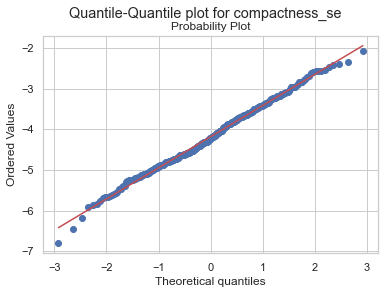

In [54]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[15])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[15])

P-value of concavity_se is 0.0018377768574282527
The distribution dosen't look Gaussian. We can't accept the null hypothesis


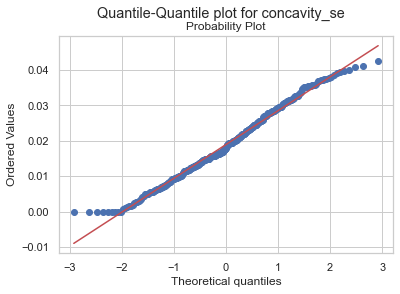

In [55]:
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = colTransform[16])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[16])

In the case of "concavity_se" we can't apply the Log-Transformation,Reciprocal Transformation and Box-Cox Transformation as it conatins some non-positive values. This is the closest we can approximate with the Yeo-Johnson transformation.

P-value of concave points_se is 0.009067102335393429
The distribution dosen't look Gaussian. We can't accept the null hypothesis


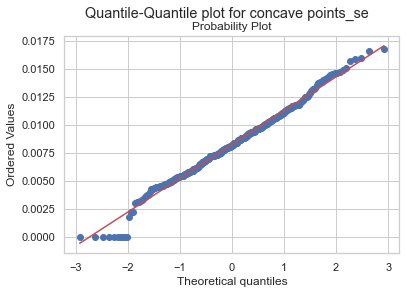

In [56]:
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = colTransform[17])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[17])

In the case of "concavity points_se" we can't apply the Log-Transformation,Reciprocal Transformation and Box-Cox Transformation as it conatins some non-positive values. This is the closest we can approximate with the Yeo-Johnson transformation.

P-value of symmetry_se is 0.3628273904323578
The distribution is approximately Gaussian. We can accept the null hypothesis


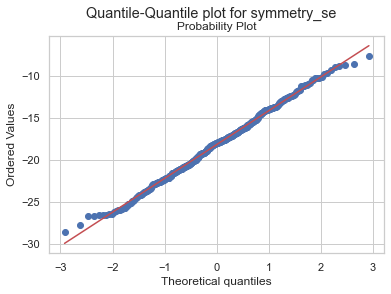

In [57]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[18])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[18])

P-value of fractal_dimension_se is 0.8576860427856445
The distribution is approximately Gaussian. We can accept the null hypothesis


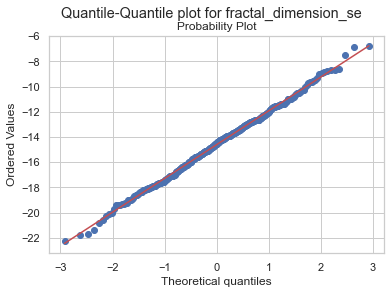

In [58]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[19])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[19])

P-value of radius_worst is 0.01688700169324875
The distribution dosen't look Gaussian. We can't accept the null hypothesis


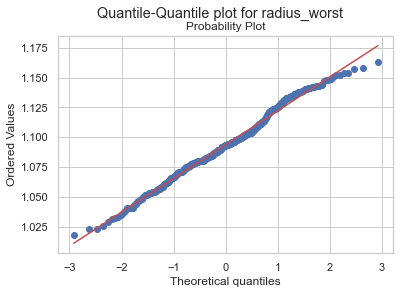

In [59]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[20])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[20])

Out of all the transformers, Box-Cox results in the best approximation.So we keep that

P-value of texture_worst is 0.7229743003845215
The distribution is approximately Gaussian. We can accept the null hypothesis


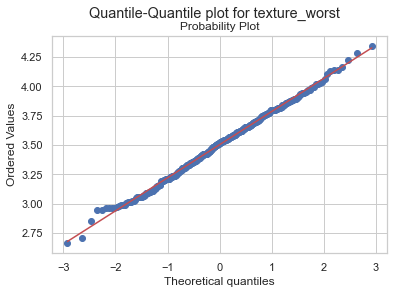

In [60]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[21])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[21])

P-value of perimeter_worst is 0.04100654646754265
The distribution dosen't look Gaussian. We can't accept the null hypothesis


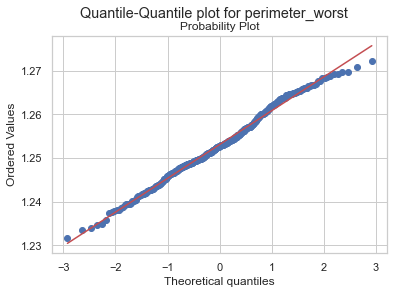

In [61]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[22])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[22])

It results the best approximation, So we keep that.

P-value of area_worst is 0.02376100979745388
The distribution dosen't look Gaussian. We can't accept the null hypothesis


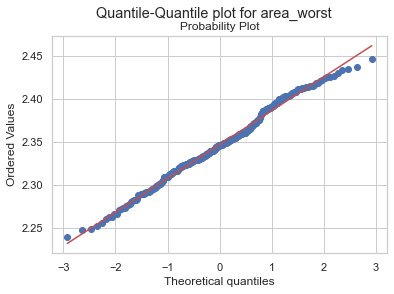

In [62]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[23])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[23])

It results the best approximation, So we got now choice !!!!

P-value of smoothness_worst is 0.4184316396713257
The distribution is approximately Gaussian. We can accept the null hypothesis


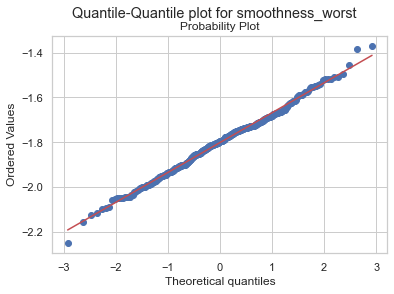

In [63]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[24])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[24])

P-value of compactness_worst is 0.8586384654045105
The distribution is approximately Gaussian. We can accept the null hypothesis


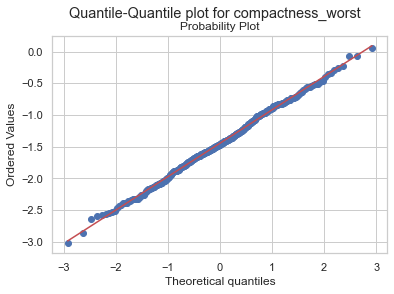

In [64]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[25])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[25])

P-value of concavity_worst is 8.357361366506666e-05
The distribution dosen't look Gaussian. We can't accept the null hypothesis


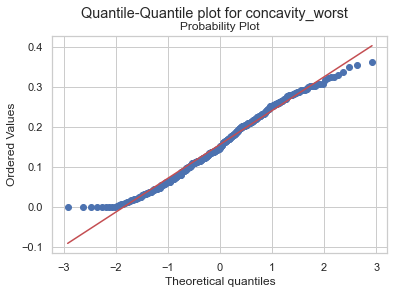

In [65]:
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = colTransform[26])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[26])

P-value of concave points_worst is 4.469048144528642e-05
The distribution dosen't look Gaussian. We can't accept the null hypothesis


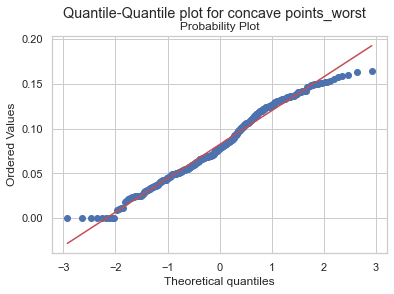

In [66]:
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = colTransform[27])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[27])

Out of the Yeo-Johnson and the Expontential transformation, Yeo-Johnson yields the best result,so we keep that.
<br>

P-value of symmetry_worst is 0.0025406666100025177
The distribution dosen't look Gaussian. We can't accept the null hypothesis


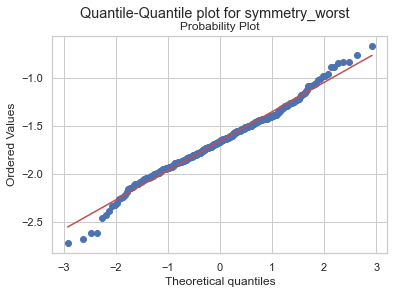

In [67]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[28])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[28])

P-value of fractal_dimension_worst is 0.8223168253898621
The distribution is approximately Gaussian. We can accept the null hypothesis


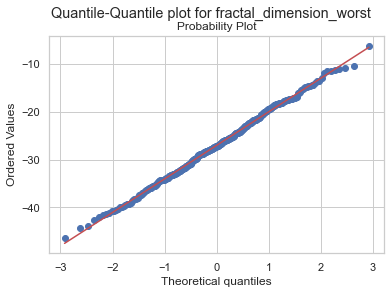

In [68]:
# set up the variable transformer
tf = vt.BoxCoxTransformer(variables = colTransform[29])
# fit the transformer
tf.fit(train_t)
# transform the data
train_t= tf.transform(train_t)
test_t= tf.transform(test_t)

#plot he data and check
normality_plot(train_t,colTransform[29])

We successfully transformed most of the variables.

### Model Fitting

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from scipy.stats import loguniform

In [70]:
def plot_condution_metrics(y_test,predictions):
    #condusion metrics
    cm = metrics.confusion_matrix(y_test, predictions)
    score = np.mean([y_test == predictions])
    #plot
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True,cbar = False);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'TEST ACCURACY SCORE: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

In [71]:
print("Training Shape",train_t.shape)
print("Testing Shape",test_t.shape)

Training Shape (398, 30)
Testing Shape (171, 30)


#### Logistic Regression
<br>

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logisticRegr = LogisticRegression(solver = 'liblinear')
test_pred = logisticRegr.fit(train_t, y_train).predict(test_t)

In [75]:
score = cross_val_score(logisticRegr, train_t, y_train, cv=9,scoring='accuracy')
print(f'The mean Cross-Valiation Score is {score.mean()}')
print(f'The Training Score is {logisticRegr.score(train_t, y_train)}')
print(f"The score on the Test-dataset is {logisticRegr.score(test_t, y_test)}")

The mean Cross-Valiation Score is 0.9395622895622895
The Training Score is 0.9472361809045227
The score on the Test-dataset is 0.9649122807017544


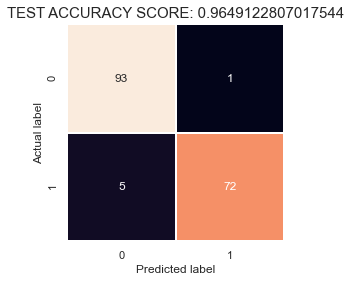

In [76]:
plot_condution_metrics(y_test,test_pred)

In [77]:
model_performance = {}
model_performance['Logistic Regression(Simple)'] = logisticRegr.score(test_t, y_test)

#### Logistic Regression (Lasso)
<br>

In [78]:
parameters = {'penalty': ['l1'],"fit_intercept":[True,False],"C" :[0.001,0.01,0.1,1,10,100],'solver' : ['liblinear'],
              'max_iter' : [500,1000]
             }

In [79]:
gridsearch = GridSearchCV(LogisticRegression(), parameters)
gridsearch.fit(train_t, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'max_iter': [500, 1000], 'penalty': ['l1'],
                         'solver': ['liblinear']})

In [80]:
gridsearch.best_params_

{'C': 10,
 'fit_intercept': True,
 'max_iter': 500,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [81]:
score  = cross_val_score(gridsearch, train_t, y_train, cv=9,scoring='accuracy')
print(f'The mean Cross-Valiation Score is {score.mean()}')
print(f'The Training Score is {gridsearch.score(train_t, y_train)}')
print(f"The score on the Test-dataset is {gridsearch.score(test_t, y_test)}")

The mean Cross-Valiation Score is 0.9622895622895622
The Training Score is 0.9773869346733668
The score on the Test-dataset is 0.9473684210526315


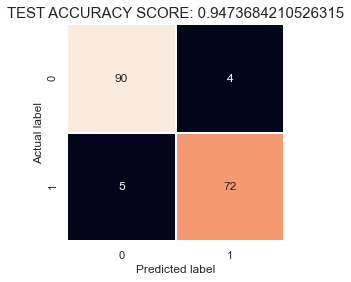

In [83]:
test_pred = gridsearch.predict(test_t)
plot_condution_metrics(y_test,test_pred)

In [84]:
model_performance['Logistic Regression(Lasso)'] = gridsearch.score(test_t, y_test)

#### Logistic Regression (Ridge)
<br>

In [85]:
parameters = {'penalty': ['l2'],"fit_intercept":[True,False],"C" : [0.001, 0.01, 0.1, 1, 10, 100],
              'solver' : ['newton-cg','liblinear'],
              'max_iter' : [100,500]
             }

In [86]:
gridsearch = GridSearchCV(LogisticRegression(), parameters)
gridsearch.fit(train_t, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False], 'max_iter': [100, 500],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'liblinear']})

In [87]:
gridsearch.best_params_

{'C': 100,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [88]:
score  = cross_val_score(gridsearch, train_t, y_train, cv=9,scoring='accuracy')
print(f'The mean Cross-Valiation Score is {score.mean()}')
print(f'The Training Score is {gridsearch.score(train_t, y_train)}')
print(f"The score on the Test-dataset is {gridsearch.score(test_t, y_test)}")

The mean Cross-Valiation Score is 0.967283950617284
The Training Score is 0.9798994974874372
The score on the Test-dataset is 0.9415204678362573


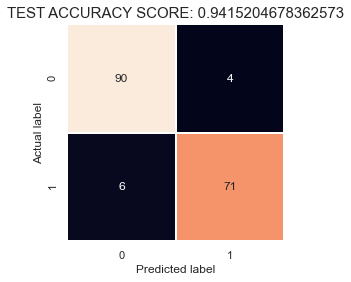

In [89]:
test_pred = gridsearch.predict(test_t)
plot_condution_metrics(y_test,test_pred)

In [90]:
model_performance['Logistic Regression(Ridge)'] = gridsearch.score(test_t, y_test)

#### Polynomial Logistic Regression
<br>

In [100]:
from sklearn.preprocessing import PolynomialFeatures
parameters = {'penalty': ['l1','l2'],"fit_intercept":[True,False],"C" :[0.001,0.01,0.1,1,10,100],'solver' : ['liblinear'],
              'max_iter' : [500,1000]
             }

In [101]:
poly_features = PolynomialFeatures(degree = 2)

train_poly = poly_features.fit_transform(train_t)
test_poly = poly_features.transform(test_t)

gridsearch = GridSearchCV(LogisticRegression(), parameters)
gridsearch.fit(train_poly, y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'max_iter': [500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [102]:
gridsearch.best_params_

{'C': 10,
 'fit_intercept': True,
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [108]:
score  = cross_val_score(gridsearch, train_t, y_train, cv=9,scoring='accuracy')
print(f'The mean Cross-Valiation Score is {score.mean()}')
print(f'The Training Score is {gridsearch.score(train_poly, y_train)}')
print(f"The score on the Test-dataset is {gridsearch.score(test_poly, y_test)}")

The mean Cross-Valiation Score is 0.9622895622895622
The Training Score is 0.9949748743718593
The score on the Test-dataset is 0.9181286549707602


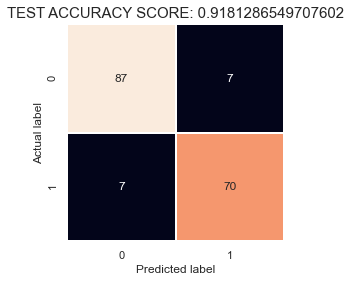

In [107]:
test_pred = gridsearch.predict(test_poly)
plot_condution_metrics(y_test,test_pred)

In [113]:
model_performance['Polynomail Logistic Regression(degree = 2)'] = gridsearch.score(test_poly, y_test)

#### KNN Classification
<br>

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
parameters = {
    'n_neighbors' :np.arange(1,50),
    "weights" : ['uniform','distance'],
    "p" : [1,2],
    
}

In [116]:
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(train_t, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [117]:
gridsearch.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [118]:
score  = cross_val_score(gridsearch, train_t, y_train, cv=9,scoring='accuracy')
print(f'The mean Cross-Valiation Score is {score.mean()}')
print(f'The Training Score is {gridsearch.score(train_t, y_train)}')
print(f"The score on the Test-dataset is {gridsearch.score(test_t, y_test)}")

The mean Cross-Valiation Score is 0.8465207631874299
The Training Score is 0.9020100502512562
The score on the Test-dataset is 0.8128654970760234


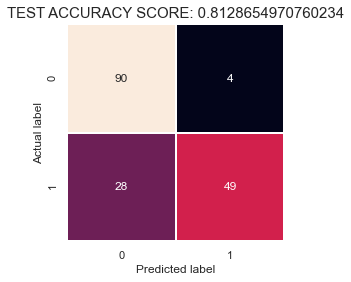

In [119]:
test_pred = gridsearch.predict(test_t)
plot_condution_metrics(y_test,test_pred)

In [120]:
model_performance['KNN Classifier (n = 5)'] = gridsearch.score(test_t, y_test)

#### Naive Bayes
<br>

In [122]:
from sklearn.naive_bayes import GaussianNB

In [131]:
gnb = GaussianNB()
test_pred = gnb.fit(train_t, y_train).predict(test_t)

In [132]:
score  = cross_val_score(gnb, train_t, y_train, cv=9,scoring='accuracy')
print(f'The mean Cross-Valiation Score is {score.mean()}')
print(f'The Training Score is {gnb.score(train_t, y_train)}')
print(f"The score on the Test-dataset is {gnb.score(test_t, y_test)}")

The mean Cross-Valiation Score is 0.9522446689113355
The Training Score is 0.957286432160804
The score on the Test-dataset is 0.9298245614035088


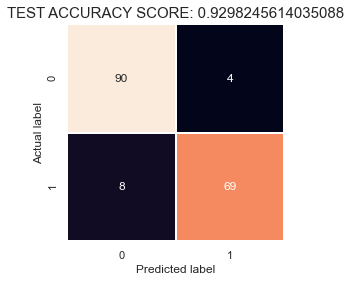

In [133]:
plot_condution_metrics(y_test,test_pred)

In [134]:
model_performance['Naive Bayes (gaussian)'] = gnb.score(test_t, y_test)

#### Support Vector Machine
<br>

In [140]:
from sklearn.svm import SVC

In [145]:
param_grid = [
    {
        "C" :[0.01,0.1,1,10,100],
        "gamma" : ['scale',0.01,0.1,1,10,100],
        "kernel" : ['rbf','linear']
        
    },
]

In [146]:
gridsearch = GridSearchCV(SVC(), param_grid)
gridsearch.fit(train_t, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': ['scale', 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf', 'linear']}])

In [147]:
gridsearch.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

In [148]:
score  = cross_val_score(gridsearch, train_t, y_train, cv=9,scoring='accuracy')
print(f'The mean Cross-Valiation Score is {score.mean()}')
print(f'The Training Score is {gridsearch.score(train_t, y_train)}')
print(f"The score on the Test-dataset is {gridsearch.score(test_t, y_test)}")

The mean Cross-Valiation Score is 0.9723905723905725
The Training Score is 0.9849246231155779
The score on the Test-dataset is 0.9415204678362573


In [149]:
model_performance['Support Vector Machine'] = gridsearch.score(test_t, y_test)

#### Decision Trees
<br>

In [168]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf_dt = DecisionTreeClassifier(random_state=42)
#build a preliminary tree
clf_dt.fit(train_t, y_train)

DecisionTreeClassifier(random_state=42)

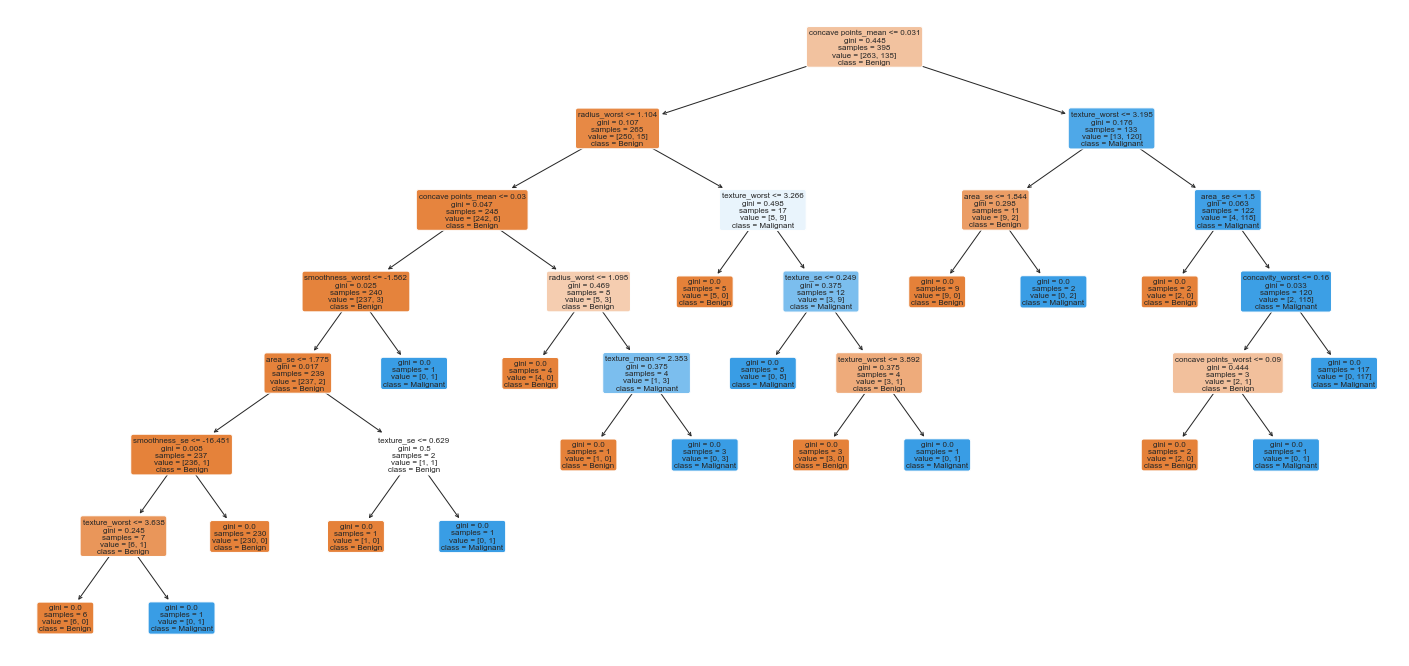

In [169]:
fig,ax = plt.subplots(figsize = (25,12))
ax = plot_tree(
    clf_dt,
    filled = True,
    rounded = True,
    class_names = ['Benign',"Malignant"],
    feature_names = train_t.columns
    
)

In [170]:
score  = cross_val_score(clf_dt, train_t, y_train, cv=9,scoring='accuracy')
print(f'The mean Cross-Valiation Score is {score.mean()}')
print(f"The score on the Train-dataset is {clf_dt.score(train_t, y_train)}")

The mean Cross-Valiation Score is 0.924635241301908
The score on the Train-dataset is 1.0


##### As we can clearly see our tree overfits the data.
<br>

###### Cost-complexity prunning

In [171]:
path = clf_dt.cost_complexity_pruning_path(train_t,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

cct_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha = ccp_alpha)
    clf_dt.fit(train_t,y_train)
    cct_dts.append(clf_dt)

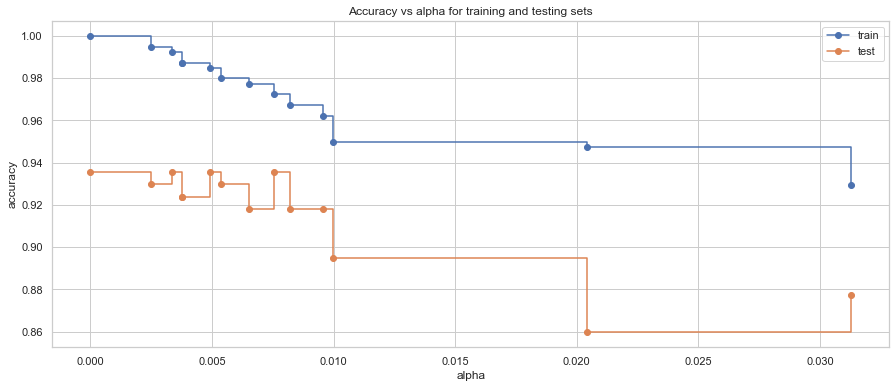

In [172]:
train_scores = [clf.score(train_t, y_train) for clf in cct_dts]
test_scores = [clf.score(test_t, y_test) for clf in cct_dts]

fig, ax = plt.subplots(figsize = (15,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Using cross-validation to find the optimal value of alpha
<br>

<AxesSubplot:xlabel='tree'>

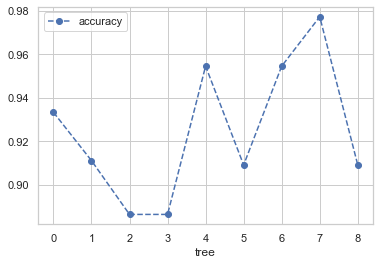

In [173]:
#looking at the figure and 'eye-balling' we see the alpha of 0.005 could be a bette value
# using K-fold CV
clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha = 0.005)
scores = cross_val_score(clf_dt, train_t, y_train, cv=9,scoring='accuracy')
#plot 
df_cv = pd.DataFrame(data = {'tree' : range(9),'accuracy':scores})
df_cv.plot(x = 'tree',y = 'accuracy',marker = 'o',linestyle = '--')

<AxesSubplot:xlabel='alpha'>

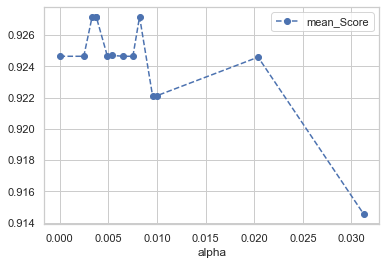

In [174]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, train_t, y_train, cv=9,scoring='accuracy')
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
#storing in a pandas datframe
alpha_df = pd.DataFrame(alpha_loop_values,columns = ['alpha','mean_Score','std_score'])

#plot df
alpha_df.plot(x = 'alpha',y = 'mean_Score',marker = 'o',linestyle = '--')

In [175]:
print('alpha values with cv score > .90')
alpha_df[alpha_df['mean_Score'] > .9 ].sort_values(by = 'mean_Score',ascending = False)

alpha values with cv score > .90


alpha  mean_Score  std_score
2   0.003350    0.927160   0.033416
3   0.003769    0.927160   0.033416
4   0.003769    0.927160   0.033416
9   0.008223    0.927160   0.025642
6   0.005383    0.924691   0.030006
0   0.000000    0.924635   0.026173
1   0.002492    0.924635   0.026173
5   0.004921    0.924635   0.030242
7   0.006533    0.924635   0.026173
8   0.007538    0.924635   0.028281
12  0.020406    0.924579   0.026252
10  0.009559    0.922110   0.024186
11  0.009976    0.922110   0.026453
13  0.031277    0.914534   0.027787

In [176]:
ideal_alpha = 0.003350

In [179]:
clf_dt_prune = DecisionTreeClassifier(random_state=42,ccp_alpha = ideal_alpha)
clf_dt_prune.fit(train_t, y_train)

DecisionTreeClassifier(ccp_alpha=0.00335, random_state=42)

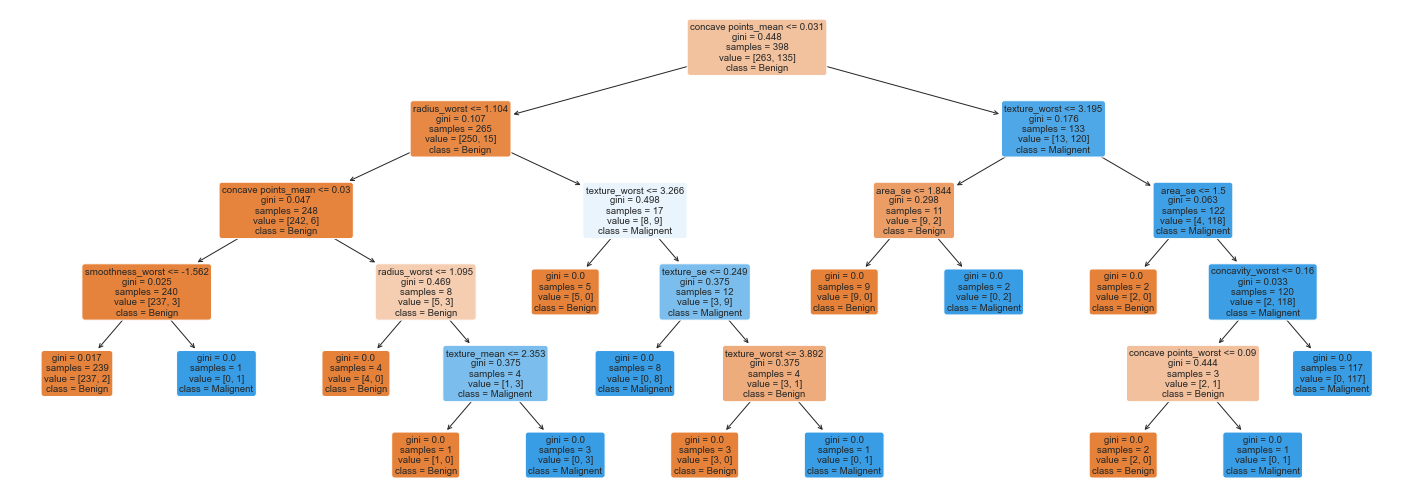

In [180]:
fig,ax = plt.subplots(figsize = (25,9))
ax = plot_tree(
    clf_dt_prune,
    filled = True,
    rounded = True,
    class_names = ['Benign',"Malignent"],
    feature_names = train_t.columns
    
)

In [181]:
print(f"The score on the Test-dataset is {clf_dt_prune.score(test_t, y_test)}")
print(f"The score on the Train-dataset is {clf_dt_prune.score(train_t, y_train)}")

The score on the Test-dataset is 0.9298245614035088
The score on the Train-dataset is 0.9949748743718593


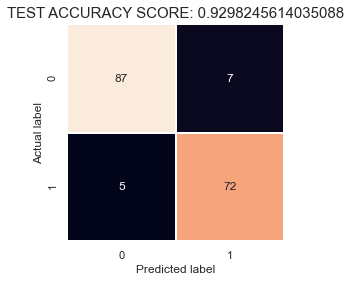

In [184]:
test_pred = clf_dt_prune.predict(test_t)
plot_condution_metrics(y_test,test_pred)

In [185]:
model_performance['Decision Tree'] = clf_dt_prune.score(test_t, y_test)

##### Visualizingthe model
<br>

In [187]:
model_performance

{'Logistic Regression(Simple)': 0.9649122807017544,
 'Logistic Regression(Lasso)': 0.9473684210526315,
 'Logistic Regression(Ridge)': 0.9415204678362573,
 'Polynomail Logistic Regression(degree = 2)': 0.9181286549707602,
 'KNN Classifier (n = 5)': 0.8128654970760234,
 'Naive Bayes (gaussian)': 0.9298245614035088,
 'Support Vector Machine': 0.9415204678362573,
 'Decision Tree': 0.9298245614035088}

In [189]:
model_df = pd.DataFrame.from_dict(model_performance,orient = 'index',columns = ['Train Accuracy'])
model_df = model_df.sort_values(by ='Train Accuracy',ascending = False)
model_df

Train Accuracy
Logistic Regression(Simple)                       0.964912
Logistic Regression(Lasso)                        0.947368
Logistic Regression(Ridge)                        0.941520
Support Vector Machine                            0.941520
Naive Bayes (gaussian)                            0.929825
Decision Tree                                     0.929825
Polynomail Logistic Regression(degree = 2)        0.918129
KNN Classifier (n = 5)                            0.812865

<AxesSubplot:xlabel='Train Accuracy'>

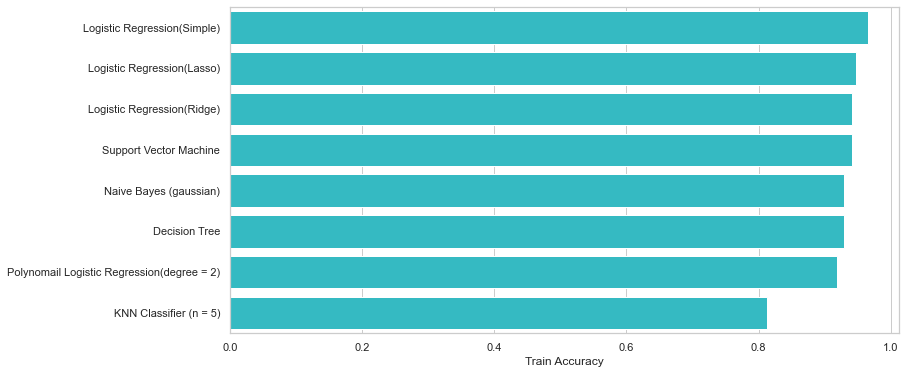

In [197]:
fig,ax = plt.subplots(figsize = (12,6))
sns.barplot(x="Train Accuracy", y=model_df.index, data=model_df,color = '#1ecfd9')